# Saber 11 Analysis Google Certification Capstone Project

## *Table of content*

<a href='#1'>Prepare phase</a>

<a href='#2'>Analysis phase</a>

## <a id='1'>Prepare phase</a>

In [1]:
# Import the requiered libraries
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from seaborn_qqplot import pplot
from scipy.stats import gamma

In [2]:
# Read the data set
df = pd.read_csv(r'E:\Estudio\Google data analytics\Capstone\Datos trabajo/icfes_data.csv', sep = ('\t'))

In [3]:
# Show the first five rows of the data set with all the columns
pd.options.display.max_columns = 100
df.head()

,ESTU_CONSECUTIVO,ESTU_TIPODOCUMENTO,ESTU_NACIONALIDAD,ESTU_GENERO,ESTU_FECHANACIMIENTO,PERIODO,ESTU_ESTUDIANTE,ESTU_PAIS_RESIDE,ESTU_TIENEETNIA,ESTU_DEPTO_RESIDE,ESTU_COD_RESIDE_DEPTO,ESTU_MCPIO_RESIDE,ESTU_COD_RESIDE_MCPIO,FAMI_ESTRATOVIVIENDA,FAMI_PERSONASHOGAR,FAMI_CUARTOSHOGAR,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,FAMI_TRABAJOLABORPADRE,FAMI_TRABAJOLABORMADRE,FAMI_TIENEINTERNET,FAMI_TIENESERVICIOTV,FAMI_TIENECOMPUTADOR,FAMI_TIENELAVADORA,FAMI_TIENEHORNOMICROOGAS,FAMI_TIENEAUTOMOVIL,FAMI_TIENEMOTOCICLETA,FAMI_TIENECONSOLAVIDEOJUEGOS,FAMI_NUMLIBROS,FAMI_COMELECHEDERIVADOS,FAMI_COMECARNEPESCADOHUEVO,FAMI_COMECEREALFRUTOSLEGUMBRE,FAMI_SITUACIONECONOMICA,ESTU_DEDICACIONLECTURADIARIA,ESTU_DEDICACIONINTERNET,ESTU_HORASSEMANATRABAJA,ESTU_TIPOREMUNERACION,COLE_CODIGO_ICFES,COLE_COD_DANE_ESTABLECIMIENTO,COLE_NOMBRE_ESTABLECIMIENTO,COLE_GENERO,COLE_NATURALEZA,COLE_CALENDARIO,COLE_BILINGUE,COLE_CARACTER,COLE_COD_DANE_SEDE,COLE_NOMBRE_SEDE,COLE_SEDE_PRINCIPAL,COLE_AREA_UBICACION,COLE_JORNADA,COLE_COD_MCPIO_UBICACION,COLE_MCPIO_UBICACION,COLE_COD_DEPTO_UBICACION,COLE_DEPTO_UBICACION,ESTU_PRIVADO_LIBERTAD,ESTU_COD_MCPIO_PRESENTACION,ESTU_MCPIO_PRESENTACION,ESTU_DEPTO_PRESENTACION,ESTU_COD_DEPTO_PRESENTACION,PUNT_LECTURA_CRITICA,PERCENTIL_LECTURA_CRITICA,DESEMP_LECTURA_CRITICA,PUNT_MATEMATICAS,PERCENTIL_MATEMATICAS,DESEMP_MATEMATICAS,PUNT_C_NATURALES,PERCENTIL_C_NATURALES,DESEMP_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PERCENTIL_SOCIALES_CIUDADANAS,DESEMP_SOCIALES_CIUDADANAS,PUNT_INGLES,PERCENTIL_INGLES,DESEMP_INGLES,PUNT_GLOBAL,PERCENTIL_GLOBAL,ESTU_INSE_INDIVIDUAL,ESTU_NSE_INDIVIDUAL,ESTU_NSE_ESTABLECIMIENTO,ESTU_ESTADOINVESTIGACION,ESTU_GENERACION-E,ESTU_ETNIA,ESTU_PILOPAGA,ESTU_LIMITA_MOTRIZ
0,SB11202040001656,TI,COLOMBIA,M,03/07/2003,20204,ESTUDIANTE,COLOMBIA,No,CALDAS,17.0,CHINCHINÁ,17174.0,Estrato 5,3 a 4,Tres,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,No sabe,"Trabaja en el hogar, no trabaja o estudia",Si,Si,Si,Si,Si,Si,Si,Si,0 A 10 LIBROS,Todos o casi todos los días,Todos o casi todos los días,Todos o casi todos los días,Peor,30 minutos o menos,Entre 1 y 3 horas,0,No,60509,317174000526,COLEGIO LOS ANDES,MIXTO,NO OFICIAL,A,N,ACADÉMICO,317174000526,COLEGIO LOS ANDES,S,URBANO,COMPLETA,17174,CHINCHINÁ,17,CALDAS,N,17174.0,CHINCHINÁ,CALDAS,17.0,53,54,3,51,51,3,50,57,2,56,74,3,48.0,61,A1,261,61.0,61.340840,3.0,3.0,PUBLICAR,NO,NaN,NaN,NaN
1,SB11202040001763,TI,COLOMBIA,F,16/06/2003,20204,ESTUDIANTE,COLOMBIA,No,BOGOTÁ,11.0,BOGOTÁ D.C.,11001.0,Estrato 3,3 a 4,Tres,Postgrado,Educación profesional completa,"Trabaja como profesional (por ejemplo médico, ...","Trabaja como profesional (por ejemplo médico, ...",Si,Si,Si,Si,Si,Si,No,No,MÁS DE 100 LIBROS,3 a 5 veces por semana,Todos o casi todos los días,3 a 5 veces por semana,Igual,30 minutos o menos,Entre 1 y 3 horas,Entre 11 y 20 horas,No,46789,311001038201,LIC DE LA UNIVERSIDAD CATOLICA,MIXTO,NO OFICIAL,A,N,ACADÉMICO,311001038201,LIC DE LA UNIVERSIDAD CATOLICA,S,URBANO,COMPLETA,11001,BOGOTÁ D.C.,11,BOGOTÁ,N,11001.0,BOGOTÁ D.C.,BOGOTÁ,11.0,62,82,3,64,86,3,63,91,3,57,74,3,58.0,85,A2,306,87.0,71.825844,4.0,4.0,PUBLICAR,NO,NaN,NaN,NaN
2,SB11202040001490,TI,COLOMBIA,F,11/09/2003,20204,ESTUDIANTE,COLOMBIA,No,BOGOTÁ,11.0,BOGOTÁ D.C.,11001.0,Estrato 1,3 a 4,Dos,Técnica o tecnológica completa,Técnica o tecnológica incompleta,"Trabaja como profesional (por ejemplo médico, ...","Trabaja en el hogar, no trabaja o estudia",Si,Si,No,Si,Si,No,No,No,26 A 100 LIBROS,3 a 5 veces por semana,Todos o casi todos los días,3 a 5 veces por semana,Peor,Entre 30 y 60 minutos,Más de 3 horas,0,No,665729,111001100021,COLEGIO GIMNASIO SABIO CALDAS (IED),MIXTO,OFICIAL,A,N,ACADÉMICO,111001100021,COLEGIO GIMNASIO SABIO CALDAS (IED),S,URBANO,UNICA,11001,BOGOTÁ D.C.,11,BOGOTÁ,N,11001.0,BOGOTÁ D.C.,BOGOTÁ,11.0,65,90,3,66,91,3,63,92,3,67,94,3,51.0,71,A1,321,92.0,57.286312,3.0,3.0,PUBLICAR,NO,NaN,NaN,NaN
3,SB11202040096445,TI,COLOMBIA,M,05/03/2004,20204,ESTUDIANTE,COLOMBIA,No,BOGOTÁ,11.0,BOGOTÁ D.C.,11001

In [4]:
# Show all the column names
df.columns

Index(['ESTU_CONSECUTIVO', 'ESTU_TIPODOCUMENTO', 'ESTU_NACIONALIDAD',
       'ESTU_GENERO', 'ESTU_FECHANACIMIENTO', 'PERIODO', 'ESTU_ESTUDIANTE',
       'ESTU_PAIS_RESIDE', 'ESTU_TIENEETNIA', 'ESTU_DEPTO_RESIDE',
       'ESTU_COD_RESIDE_DEPTO', 'ESTU_MCPIO_RESIDE', 'ESTU_COD_RESIDE_MCPIO',
       'FAMI_ESTRATOVIVIENDA', 'FAMI_PERSONASHOGAR', 'FAMI_CUARTOSHOGAR',
       'FAMI_EDUCACIONPADRE', 'FAMI_EDUCACIONMADRE', 'FAMI_TRABAJOLABORPADRE',
       'FAMI_TRABAJOLABORMADRE', 'FAMI_TIENEINTERNET', 'FAMI_TIENESERVICIOTV',
       'FAMI_TIENECOMPUTADOR', 'FAMI_TIENELAVADORA',
       'FAMI_TIENEHORNOMICROOGAS', 'FAMI_TIENEAUTOMOVIL',
       'FAMI_TIENEMOTOCICLETA', 'FAMI_TIENECONSOLAVIDEOJUEGOS',
       'FAMI_NUMLIBROS', 'FAMI_COMELECHEDERIVADOS',
       'FAMI_COMECARNEPESCADOHUEVO', 'FAMI_COMECEREALFRUTOSLEGUMBRE',
       'FAMI_SITUACIONECONOMICA', 'ESTU_DEDICACIONLECTURADIARIA',
       'ESTU_DEDICACIONINTERNET', 'ESTU_HORASSEMANATRABAJA',
       'ESTU_TIPOREMUNERACION', 'COLE_CODIGO_ICFES',


In [5]:
# Select all the columns to stay
Col_work = ['ESTU_GENERO', 'PERIODO', 'ESTU_TIENEETNIA', 'ESTU_DEPTO_RESIDE',
        'FAMI_ESTRATOVIVIENDA', 'FAMI_EDUCACIONPADRE', 'FAMI_EDUCACIONMADRE', 
        'FAMI_TIENEINTERNET', 'FAMI_TIENECOMPUTADOR', 'FAMI_COMELECHEDERIVADOS',
        'FAMI_COMECARNEPESCADOHUEVO', 'FAMI_COMECEREALFRUTOSLEGUMBRE', 'ESTU_HORASSEMANATRABAJA',
        'COLE_GENERO', 'COLE_NATURALEZA', 'COLE_CALENDARIO', 'COLE_BILINGUE',
        'COLE_CARACTER', 'COLE_AREA_UBICACION', 'COLE_JORNADA',
        'COLE_DEPTO_UBICACION', 'PUNT_LECTURA_CRITICA',
        'PUNT_MATEMATICAS', 'PUNT_C_NATURALES', 'PUNT_SOCIALES_CIUDADANAS', 
        'PUNT_INGLES', 'PUNT_GLOBAL', 'ESTU_ETNIA', 'ESTU_LIMITA_MOTRIZ']

In [6]:
# Delete the columns we are not going to use
df.drop(columns=[col for col in df if col not in Col_work], inplace=True)

In [7]:
# Show the first rows to validate
df.head()

,ESTU_GENERO,PERIODO,ESTU_TIENEETNIA,ESTU_DEPTO_RESIDE,FAMI_ESTRATOVIVIENDA,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,FAMI_TIENEINTERNET,FAMI_TIENECOMPUTADOR,FAMI_COMELECHEDERIVADOS,FAMI_COMECARNEPESCADOHUEVO,FAMI_COMECEREALFRUTOSLEGUMBRE,ESTU_HORASSEMANATRABAJA,COLE_GENERO,COLE_NATURALEZA,COLE_CALENDARIO,COLE_BILINGUE,COLE_CARACTER,COLE_AREA_UBICACION,COLE_JORNADA,COLE_DEPTO_UBICACION,PUNT_LECTURA_CRITICA,PUNT_MATEMATICAS,PUNT_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PUNT_INGLES,PUNT_GLOBAL,ESTU_ETNIA,ESTU_LIMITA_MOTRIZ
0,M,20204,No,CALDAS,Estrato 5,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,Si,Si,Todos o casi todos los días,Todos o casi todos los días,Todos o casi todos los días,0,MIXTO,NO OFICIAL,A,N,ACADÉMICO,URBANO,COMPLETA,CALDAS,53,51,50,56,48.0,261,NaN,NaN
1,F,20204,No,BOGOTÁ,Estrato 3,Postgrado,Educación profesional completa,Si,Si,3 a 5 veces por semana,Todos o casi todos los días,3 a 5 veces por semana,Entre 11 y 20 horas,MIXTO,NO OFICIAL,A,N,ACADÉMICO,URBANO,COMPLETA,BOGOTÁ,62,64,63,57,58.0,306,NaN,NaN
2,F,20204,No,BOGOTÁ,Estrato 1,Técnica o tecnológica completa,Técnica o tecnológica incompleta,Si,No,3 a 5 veces por semana,Todos o casi todos los días,3 a 5 veces por semana,0,MIXTO,OFICIAL,A,N,ACADÉMICO,URBANO,UNICA,BOGOTÁ,65,66,63,67,51.0,321,NaN,NaN
3,M,20204,No,BOGOTÁ,Estrato 3,Postgrado,Educación profesional completa,Si,Si,3 a 5 veces por semana,Todos o casi todos los días,1 o 2 veces por semana,0,MIXTO,NO OFICIAL,A,N,ACADÉMICO,URBANO,COMPLETA,BOGOTÁ,64,65,75,67,67.0,338,NaN,NaN
4,M,20204,No,TOLIMA,Estrato 1,Primaria completa,Secundaria (Bachillerato) incompleta,Si,No,1 o 2 veces por semana,1 o 2 veces por semana,1 o 2 veces por semana,Entre 11 y 20 horas,MIXTO,OFICIAL,A,N,ACADÉMICO,URBANO,MAÑANA,TOLIMA,56,44,45,40,29.0,225,NaN,NaN


In [8]:
# Validate the quantity of columns and rows
df.shape

(1650063, 29)

In [9]:
# Create the df work
df_work = df.copy()

I decide to translate some of the values to English, so the values are transformed.

In [10]:
df_work['ESTU_TIENEETNIA'] = df_work['ESTU_TIENEETNIA'].replace('Si','Yes')

In [11]:
df_work['ESTU_DEPTO_RESIDE'] = df_work['ESTU_DEPTO_RESIDE'].replace('EXTRANJERO','FOREIGN')

In [12]:
df_work['FAMI_ESTRATOVIVIENDA'] = df_work['FAMI_ESTRATOVIVIENDA'].replace({'Estrato 1':'Stratum 1',
                                                                    'Estrato 2':'Stratum 2',
                                                                    'Estrato 3':'Stratum 3',
                                                                    'Estrato 4':'Stratum 4',
                                                                    'Estrato 5':'Stratum 5',
                                                                    'Estrato 6':'Stratum 6',
                                                                    'Sin Estrato':'Without stratum'})

In [13]:
df_work['FAMI_EDUCACIONPADRE'] = df_work['FAMI_EDUCACIONPADRE'].replace({'Secundaria (Bachillerato) completa':'Secondary school (Bachillerato) completed',
                                                                    'Postgrado':'Postgraduate',
                                                                    'Técnica o tecnológica completa':'Complete technical or technological',
                                                                    'Primaria completa':'Completed elementary school',
                                                                    'Primaria incompleta':'Incompleted elementary school',
                                                                    'Ninguno':'None',
                                                                    'Educación profesional incompleta':'Incomplete professional education',
                                                                    'No sabe':'Do not know',
                                                                    'Educación profesional completa':'Complete professional education',
                                                                    'No Aplica':'Not applicable',
                                                                    'Secundaria (Bachillerato) incompleta':'Incomplete high school (Bachillerato)',
                                                                    'Técnica o tecnológica incompleta':'Incomplete technical or technological'})

In [14]:
df_work['FAMI_EDUCACIONMADRE'] = df_work['FAMI_EDUCACIONMADRE'].replace({'Secundaria (Bachillerato) completa':'Secondary school (Bachillerato) completed',
                                                                    'Postgrado':'Postgraduate',
                                                                    'Técnica o tecnológica completa':'Complete technical or technological',
                                                                    'Primaria completa':'Completed elementary school',
                                                                    'Primaria incompleta':'Incompleted elementary school',
                                                                    'Ninguno':'None',
                                                                    'Educación profesional incompleta':'Incomplete professional education',
                                                                    'No sabe':'Do not know',
                                                                    'Educación profesional completa':'Complete professional education',
                                                                    'No Aplica':'Not applicable',
                                                                    'Secundaria (Bachillerato) incompleta':'Incomplete high school (Bachillerato)',
                                                                    'Técnica o tecnológica incompleta':'Incomplete technical or technological'})

In [15]:
df_work['FAMI_TIENEINTERNET'] = df_work['FAMI_TIENEINTERNET'].replace('Si','Yes')

In [16]:
df_work['FAMI_TIENECOMPUTADOR'] = df_work['FAMI_TIENECOMPUTADOR'].replace('Si','Yes')

In [17]:
df_work['FAMI_COMELECHEDERIVADOS'] = df_work['FAMI_COMELECHEDERIVADOS'].replace({'Todos o casi todos los días':'Every day or almost every day',
                                                                    '3 a 5 veces por semana':'3 to 5 times a week',
                                                                    '1 o 2 veces por semana':'1 or 2 times a week',
                                                                    'Nunca o rara vez comemos eso':'We never or rarely eat that'})

In [18]:
df_work['FAMI_COMECARNEPESCADOHUEVO'] = df_work['FAMI_COMECARNEPESCADOHUEVO'].replace({'Todos o casi todos los días':'Every day or almost every day',
                                                                    '3 a 5 veces por semana':'3 to 5 times a week',
                                                                    '1 o 2 veces por semana':'1 or 2 times a week',
                                                                    'Nunca o rara vez comemos eso':'We never or rarely eat that'})

In [19]:
df_work['FAMI_COMECEREALFRUTOSLEGUMBRE'] = df_work['FAMI_COMECEREALFRUTOSLEGUMBRE'].replace({'Todos o casi todos los días':'Every day or almost every day',
                                                                    '3 a 5 veces por semana':'3 to 5 times a week',
                                                                    '1 o 2 veces por semana':'1 or 2 times a week',
                                                                    'Nunca o rara vez comemos eso':'We never or rarely eat that'})

In [20]:
df_work['ESTU_HORASSEMANATRABAJA'] = df_work['ESTU_HORASSEMANATRABAJA'].replace({'Entre 11 y 20 horas':'Between 11 and 20 hours',
                                                                    'Menos de 10 horas':'Less than 10 hours',
                                                                    'Más de 30 horas':'More than 30 hours',
                                                                    'Entre 21 y 30 horas':'Between 21 and 30 hours'})

In [21]:
df_work['COLE_GENERO'] = df_work['COLE_GENERO'].replace({'MIXTO':'MIXTED',
                                                        'FEMENINO':'FEMENINE',
                                                        'MASCULINO':'MASCULINE'})

In [22]:
df_work['COLE_NATURALEZA'] = df_work['COLE_NATURALEZA'].replace({'NO OFICIAL':'NO OFFICIAL',
                                                        'OFICIAL':'OFFICIAL'})

In [23]:
df_work['COLE_CALENDARIO'] = df_work['COLE_CALENDARIO'].replace('OTRO','OTHER')

In [24]:
df_work['COLE_BILINGUE'] = df_work['COLE_BILINGUE'].replace({'N':'No',
                                                        'S':'Yes'})

In [25]:
df_work['COLE_CARACTER'] = df_work['COLE_CARACTER'].replace({'ACADÉMICO':'ACADEMIC',
                                                        'TÉCNICO/ACADÉMICO':'TECHNICAL/ACADEMIC',
                                                        'TÉCNICO':'TECHNICAL',
                                                        'NO APLICA':'NOT APPLICABLE'})

In [26]:
df_work['COLE_AREA_UBICACION'] = df_work['COLE_AREA_UBICACION'].replace('URBANO','URBAN')

In [27]:
df_work['COLE_JORNADA'] = df_work['COLE_JORNADA'].replace({'COMPLETA':'FULL',
                                                        'UNICA':'UNIQUE',
                                                        'MAÑANA':'MORNING',
                                                        'TARDE':'AFTERNOON',
                                                        'NOCHE':'NIGHT',
                                                        'SABATINA':'SABATINE'})

In [28]:
df_work['ESTU_ETNIA'] = df_work['ESTU_ETNIA'].replace({'Ninguno':'None',
                                                        'Comunidad afrodescendiente':'Afro-descendant community',
                                                        'Otro grupo étnico minoritario':'Other ethnic minority group',
                                                        'Comunidades Rom (Gitanas)':'Gypsy Communities'})

In [29]:
df_work['ESTU_ETNIA'].unique()

array([nan, 'None', 'Afro-descendant community', 'Zenú',
       'Other ethnic minority group', 'Wayúu', 'Paez', 'Emberá', 'Cubeo',
       'Guambiano', 'Raizal', 'Sikuani', 'Pijao', 'Inga', 'Pasto',
       'Huitoto', 'Arhuaco', 'Cancuamo', 'Palenquero', 'Tucano',
       'Gypsy Communities'], dtype=object)

I decide to rename some of the columns translating to English.

In [30]:
# Rename the columns
df_work = df_work.rename(columns={'ESTU_GENERO':'STU_GENDER',
                            'PERIODO':'PERIOD',
                            'ESTU_TIENEETNIA':'STU_HAS_ETHNICITY',
                            'ESTU_DEPTO_RESIDE':'STU_RESI_DEPART',
                            'FAMI_ESTRATOVIVIENDA':'FAMI_STRA_HOUSE',
                            'FAMI_EDUCACIONPADRE':'FAMI_EDU_FATHER',
                            'FAMI_EDUCACIONMADRE':'FAMI_EDU_MOTHER',
                            'FAMI_TIENEINTERNET':'FAMI_HAS_INTERNET',
                            'FAMI_TIENECOMPUTADOR':'FAMI_HAS_COMPUTER',
                            'FAMI_COMELECHEDERIVADOS':'FAMI_EATS_MILK_AND_DERIVATES',
                            'FAMI_COMECARNEPESCADOHUEVO':'FAMI_EATS_MEAT_FISH_EGG',
                            'FAMI_COMECEREALFRUTOSLEGUMBRE':'FAMI_EATS_CEREAL_FRUITS_LEGUME',
                            'ESTU_HORASSEMANATRABAJA':'STU_WORK_HOURS_PER_WEEK',
                            'COLE_GENERO':'SCH_GENDER',
                            'COLE_NATURALEZA':'SCH_NAT',
                            'COLE_CALENDARIO':'SCH_CALENDAR',
                            'COLE_BILINGUE':'SCH_BILINGUAL',
                            'COLE_CARACTER':'SCH_CHAR',
                            'COLE_AREA_UBICACION':'SCH_LOCATION_AREA',
                            'COLE_JORNADA':'SCH_JOURNEY',
                            'COLE_DEPTO_UBICACION':'SCH_DEP',
                            'PUNT_LECTURA_CRITICA':'SCORE_CRITICAL_READING',
                            'PUNT_MATEMATICAS':'SCORE_MATHEMATICS',
                            'PUNT_C_NATURALES':'SCORE_N_SCIENCES',
                            'PUNT_SOCIALES_CIUDADANAS':'SCORE_SOCIAL',
                            'PUNT_INGLES':'SCORE_ENGLISH',
                            'PUNT_GLOBAL':'SCORE_GLOBAL',
                            'ESTU_ETNIA':'STU_ETHNICITY',
                            'ESTU_LIMITA_MOTRIZ':'STU_MOTOR_LIMITATION'})

In [31]:
# Obtain initial information from the dataset
df_work.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1650063 entries, 0 to 1650062
Data columns (total 29 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   STU_GENDER                      1649948 non-null  object 
 1   PERIOD                          1650063 non-null  int64  
 2   STU_HAS_ETHNICITY               1645775 non-null  object 
 3   STU_RESI_DEPART                 1648767 non-null  object 
 4   FAMI_STRA_HOUSE                 1555890 non-null  object 
 5   FAMI_EDU_FATHER                 1567648 non-null  object 
 6   FAMI_EDU_MOTHER                 1567528 non-null  object 
 7   FAMI_HAS_INTERNET               1566293 non-null  object 
 8   FAMI_HAS_COMPUTER               1590979 non-null  object 
 9   FAMI_EATS_MILK_AND_DERIVATES    1555321 non-null  object 
 10  FAMI_EATS_MEAT_FISH_EGG         1561432 non-null  object 
 11  FAMI_EATS_CEREAL_FRUITS_LEGUME  1554418 non-null  object 
 12  

Here I can see that some of the attributes have null values, and the most important thing is that the 'STU_MOTOR_LIMITATION' only has a non-null value, for this reason it should not be included in the analysis.
We have 22 attributes whose data type is Char, 6 are integer and 1 is float. The PERIOD variable should be treated as char, so it is need it a data type change.

In [32]:
# Data type change for PERIOD, int to str
df_work.PERIOD = df_work.PERIOD.astype(str)

In [33]:
# Data type validation
df_work.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1650063 entries, 0 to 1650062
Data columns (total 29 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   STU_GENDER                      1649948 non-null  object 
 1   PERIOD                          1650063 non-null  object 
 2   STU_HAS_ETHNICITY               1645775 non-null  object 
 3   STU_RESI_DEPART                 1648767 non-null  object 
 4   FAMI_STRA_HOUSE                 1555890 non-null  object 
 5   FAMI_EDU_FATHER                 1567648 non-null  object 
 6   FAMI_EDU_MOTHER                 1567528 non-null  object 
 7   FAMI_HAS_INTERNET               1566293 non-null  object 
 8   FAMI_HAS_COMPUTER               1590979 non-null  object 
 9   FAMI_EATS_MILK_AND_DERIVATES    1555321 non-null  object 
 10  FAMI_EATS_MEAT_FISH_EGG         1561432 non-null  object 
 11  FAMI_EATS_CEREAL_FRUITS_LEGUME  1554418 non-null  object 
 12  

In [34]:
# Show the number of unique values per attribute
df_work.nunique()

STU_GENDER                          2
PERIOD                              6
STU_HAS_ETHNICITY                   2
STU_RESI_DEPART                    35
FAMI_STRA_HOUSE                     7
FAMI_EDU_FATHER                    12
FAMI_EDU_MOTHER                    12
FAMI_HAS_INTERNET                   2
FAMI_HAS_COMPUTER                   2
FAMI_EATS_MILK_AND_DERIVATES        4
FAMI_EATS_MEAT_FISH_EGG             4
FAMI_EATS_CEREAL_FRUITS_LEGUME      4
STU_WORK_HOURS_PER_WEEK             5
SCH_GENDER                          3
SCH_NAT                             2
SCH_CALENDAR                        3
SCH_BILINGUAL                       2
SCH_CHAR                            4
SCH_LOCATION_AREA                   2
SCH_JOURNEY                         6
SCH_DEP                            34
SCORE_CRITICAL_READING             67
SCORE_MATHEMATICS                  76
SCORE_N_SCIENCES                   66
SCORE_SOCIAL                       72
SCORE_ENGLISH                      75
SCORE_GLOBAL

The number of unique values seems to be fine, except for the 'STU_MOTOR_LIMITATION' which has only one value.

In [35]:
# Data transformation  for standarize Bogotá (BOGOTA --> BOGOTÁ)
a = df_work.sort_values(by='STU_RESI_DEPART')
a['STU_RESI_DEPART'].unique()

array(['AMAZONAS', 'ANTIOQUIA', 'ARAUCA', 'ATLANTICO', 'BOGOTA', 'BOGOTÁ',
       'BOLIVAR', 'BOYACA', 'CALDAS', 'CAQUETA', 'CASANARE', 'CAUCA',
       'CESAR', 'CHOCO', 'CORDOBA', 'CUNDINAMARCA', 'FOREIGN', 'GUAINIA',
       'GUAVIARE', 'HUILA', 'LA GUAJIRA', 'MAGDALENA', 'META', 'NARIÑO',
       'NORTE SANTANDER', 'PUTUMAYO', 'QUINDIO', 'RISARALDA',
       'SAN ANDRES', 'SANTANDER', 'SUCRE', 'TOLIMA', 'VALLE', 'VAUPES',
       'VICHADA', nan], dtype=object)

In [36]:
df_work['STU_RESI_DEPART'] = df_work['STU_RESI_DEPART'].replace('BOGOTA','BOGOTÁ')
df_work['SCH_DEP'] = df_work['SCH_DEP'].replace('BOGOTA','BOGOTÁ')

In [37]:
# Establish the nulls percentage per attribute 
df_work.isnull().sum()*100/df_work.shape[0]

STU_GENDER                         0.006969
PERIOD                             0.000000
STU_HAS_ETHNICITY                  0.259869
STU_RESI_DEPART                    0.078542
FAMI_STRA_HOUSE                    5.707237
FAMI_EDU_FATHER                    4.994658
FAMI_EDU_MOTHER                    5.001930
FAMI_HAS_INTERNET                  5.076776
FAMI_HAS_COMPUTER                  3.580712
FAMI_EATS_MILK_AND_DERIVATES       5.741720
FAMI_EATS_MEAT_FISH_EGG            5.371371
FAMI_EATS_CEREAL_FRUITS_LEGUME     5.796445
STU_WORK_HOURS_PER_WEEK            3.400476
SCH_GENDER                         0.000000
SCH_NAT                            0.000000
SCH_CALENDAR                       0.000000
SCH_BILINGUAL                     15.862909
SCH_CHAR                           2.632021
SCH_LOCATION_AREA                  0.000000
SCH_JOURNEY                        0.000000
SCH_DEP                            0.000000
SCORE_CRITICAL_READING             0.000000
SCORE_MATHEMATICS               

In [38]:
df_work[df_work['STU_GENDER'].isnull()]

,STU_GENDER,PERIOD,STU_HAS_ETHNICITY,STU_RESI_DEPART,FAMI_STRA_HOUSE,FAMI_EDU_FATHER,FAMI_EDU_MOTHER,FAMI_HAS_INTERNET,FAMI_HAS_COMPUTER,FAMI_EATS_MILK_AND_DERIVATES,FAMI_EATS_MEAT_FISH_EGG,FAMI_EATS_CEREAL_FRUITS_LEGUME,STU_WORK_HOURS_PER_WEEK,SCH_GENDER,SCH_NAT,SCH_CALENDAR,SCH_BILINGUAL,SCH_CHAR,SCH_LOCATION_AREA,SCH_JOURNEY,SCH_DEP,SCORE_CRITICAL_READING,SCORE_MATHEMATICS,SCORE_N_SCIENCES,SCORE_SOCIAL,SCORE_ENGLISH,SCORE_GLOBAL,STU_ETHNICITY,STU_MOTOR_LIMITATION
84689,NaN,20204,NaN,CUNDINAMARCA,Stratum 2,Do not know,Secondary school (Bachillerato) completed,Yes,Yes,1 or 2 times a week,1 or 2 times a week,3 to 5 times a week,0,MIXTED,NO OFFICIAL,A,No,ACADEMIC,URBAN,MORNING,CUNDINAMARCA,59,41,59,64,53.0,278,NaN,NaN
141818,NaN,20204,NaN,BOGOTÁ,Stratum 4,Complete professional education,Complete professional education,Yes,Yes,3 to 5 times a week,Every day or almost every day,3 to 5 times a week,0,MIXTED,NO OFFICIAL,A,No,ACADEMIC,URBAN,FULL,BOGOTÁ,60,64,61,62,76.0,314,NaN,NaN
210580,NaN,20204,NaN,BOGOTÁ,Stratum 2,Do not know,Secondary school (Bachillerato) completed,Yes,No,3 to 5 times a week,Every day or almost every day,1 or 2 times a week,0,MIXTED,NO OFFICIAL,A,No,ACADEMIC,URBAN,NIGHT,BOGOTÁ,58,44,39,51,47.0,240,NaN,NaN
288941,NaN,20204,NaN,ANTIOQUIA,Stratum 3,Incompleted elementary school,Incompleted elementary school,No,Yes,1 or 2 times a week,3 to 5 times a week,1 or 2 times a week,0,MIXTED,OFFICIAL,A,NaN,NaN,RURAL,FULL,ANTIOQUIA,39,43,39,36,34.0,194,NaN,NaN
366767,NaN,20204,No,BOLIVAR,Stratum 3,Complete professional education,Complete professional education,Yes,No,1 or 2 times a week,3 to 5 times a week,1 or 2 times a week,0,MIXTED,NO OFFICIAL,A,No,ACADEMIC,URBAN,MORNING,BOLIVAR,67,59,51,56,52.0,289,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1035227,NaN,20194,No,BOGOTÁ,Stratum 2,Secondary school (Bachillerato) completed,Secondary school (Bachillerato) completed,Yes,Yes,We never or rarely eat that,3 to 5 times a week,3 to 5 times a week,Between 11 and 20 hours,MIXTED,OFFICIAL,A,NaN,ACADEMIC,URBAN,MORNING,BOGOTÁ,64,67,54,56,61.0,302,NaN,NaN
1037369,NaN,20194,No,CHOCO,Stratum 2,None,Incompleted elementary school,No,No,We never or rarely eat that,3 to 5 times a week,1 or 2 times a week,Less than 10 hours,MIXTED,OFFICIAL,A,NaN,TECHNICAL/ACADEMIC,URBAN,MORNING,CHOCO,34,39,36,28,27.0,168,NaN,NaN
1038953,NaN,20194,No,CORDOBA,Stratum 1,Completed elementary school,Secondary school (Bachillerato) completed,No,No,1 or 2 times a week,3 to 5 times a week,We never or rarely eat that,0,MIXTED,OFFICIAL,A,No,ACADEMIC,RURAL,MORNING,CORDOBA,53,53,47,34,47.0,234,NaN,NaN
1043192,NaN,20194,No,ATLANTICO,Stratum 2,Completed elementary school,Secondary school (Bachillerato) completed,No,No,3 to 5 times a week,3 to 5 times a week,We never or rarely eat that,Less than 10 hours,MIXTED,OFFICIAL,A,NaN,ACADEMIC,URBAN,MORNING,ATLANTICO,42,33,32,32,33.0,173,NaN,NaN


After reviewing the percentages and null data, I have decided to perform the elimination of all those records that have null data, with the exception of SCH_BILINGUAL whose null value will be transformed to 'No', and STU_ETHNICITY whose null value will be transformed to 'None', and STU_MOTOR_LIMITATION which will be eliminated.

In [39]:
# Replace the null values in SCH_BILINGUAL with 'No'
df_work['SCH_BILINGUAL'].fillna('No', inplace = True)

In [40]:
# Validate the null replace
df_work['SCH_BILINGUAL'].unique()

array(['No', 'Yes'], dtype=object)

In [41]:
# Replace the null values in STU_ETHNICITY with 'None'
df_work['STU_ETHNICITY'].fillna('None', inplace = True)

In [42]:
# Validate the null replace
df_work['STU_ETHNICITY'].unique()

array(['None', 'Afro-descendant community', 'Zenú',
       'Other ethnic minority group', 'Wayúu', 'Paez', 'Emberá', 'Cubeo',
       'Guambiano', 'Raizal', 'Sikuani', 'Pijao', 'Inga', 'Pasto',
       'Huitoto', 'Arhuaco', 'Cancuamo', 'Palenquero', 'Tucano',
       'Gypsy Communities'], dtype=object)

In [43]:
# Eliminate the column STU_MOTOR_LIMITATION
df_work.drop(columns= 'STU_MOTOR_LIMITATION', inplace=True)

In [44]:
# Validate the column elimination
df_work.columns

Index(['STU_GENDER', 'PERIOD', 'STU_HAS_ETHNICITY', 'STU_RESI_DEPART',
       'FAMI_STRA_HOUSE', 'FAMI_EDU_FATHER', 'FAMI_EDU_MOTHER',
       'FAMI_HAS_INTERNET', 'FAMI_HAS_COMPUTER',
       'FAMI_EATS_MILK_AND_DERIVATES', 'FAMI_EATS_MEAT_FISH_EGG',
       'FAMI_EATS_CEREAL_FRUITS_LEGUME', 'STU_WORK_HOURS_PER_WEEK',
       'SCH_GENDER', 'SCH_NAT', 'SCH_CALENDAR', 'SCH_BILINGUAL', 'SCH_CHAR',
       'SCH_LOCATION_AREA', 'SCH_JOURNEY', 'SCH_DEP', 'SCORE_CRITICAL_READING',
       'SCORE_MATHEMATICS', 'SCORE_N_SCIENCES', 'SCORE_SOCIAL',
       'SCORE_ENGLISH', 'SCORE_GLOBAL', 'STU_ETHNICITY'],
      dtype='object')

In [45]:
# Delete the rows with nulls
df_work.dropna(inplace=True)

In [46]:
# Validate the null elimination
df_work.isnull().sum()*100/df_work.shape[0]

STU_GENDER                        0.0
PERIOD                            0.0
STU_HAS_ETHNICITY                 0.0
STU_RESI_DEPART                   0.0
FAMI_STRA_HOUSE                   0.0
FAMI_EDU_FATHER                   0.0
FAMI_EDU_MOTHER                   0.0
FAMI_HAS_INTERNET                 0.0
FAMI_HAS_COMPUTER                 0.0
FAMI_EATS_MILK_AND_DERIVATES      0.0
FAMI_EATS_MEAT_FISH_EGG           0.0
FAMI_EATS_CEREAL_FRUITS_LEGUME    0.0
STU_WORK_HOURS_PER_WEEK           0.0
SCH_GENDER                        0.0
SCH_NAT                           0.0
SCH_CALENDAR                      0.0
SCH_BILINGUAL                     0.0
SCH_CHAR                          0.0
SCH_LOCATION_AREA                 0.0
SCH_JOURNEY                       0.0
SCH_DEP                           0.0
SCORE_CRITICAL_READING            0.0
SCORE_MATHEMATICS                 0.0
SCORE_N_SCIENCES                  0.0
SCORE_SOCIAL                      0.0
SCORE_ENGLISH                     0.0
SCORE_GLOBAL

In [47]:
# Validate the percentage of rows eliminated
(df.shape[0] - df_work.shape[0])*100/df.shape[0]

12.06238792094605

We have eliminated 12% of our initial records. For this exercise it is acceptable, but in the future with more knowledge a model could be created to establish the possible values to fill in the nulls, I was not sure that the mode for categorical variables and the median for quantitative variables was the best option, due to the complex structure of the data, we could have many dependencies. 

In [48]:
# Establish the final shape of the dataframe
df_work.shape

(1451026, 28)

In [49]:
# Validate the range for the quantitave variables
df_work.describe()

,SCORE_CRITICAL_READING,SCORE_MATHEMATICS,SCORE_N_SCIENCES,SCORE_SOCIAL,SCORE_ENGLISH,SCORE_GLOBAL
count,1.451026e+06,1.451026e+06,1.451026e+06,1.451026e+06,1.451026e+06,1.451026e+06
mean,5.291330e+01,5.141413e+01,4.948319e+01,4.825465e+01,4.966617e+01,2.522545e+02
std,1.031504e+01,1.191411e+01,1.067117e+01,1.215571e+01,1.235748e+01,5.078782e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.600000e+01,4.300000e+01,4.100000e+01,3.900000e+01,4.100000e+01,2.130000e+02
50%,5.300000e+01,5.100000e+01,4.900000e+01,4.700000e+01,4.800000e+01,2.490000e+02
75%,6.000000e+01,6.000000e+01,5.700000e+01,5.700000e+01,5.700000e+01,2.880000e+02
max,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,5.000000e+02


The values are in the expected range [0 - 100] for the variables SCORE_CRITICAL_READING, SCORE_MATHEMATICS, SCORE_N_SCIENCES, SCORE_SOCIAL, SCORE_ENGLISH.

The values are in the expected range [0 - 500] for the variable SCORE_GLOBAL.

As a final stage of the prepare phase im going to import all the data to a csv file as '28_07_22_ICFES_Data_Clean.csv'

In [50]:
df_work.to_csv('28_07_22_ICFES_Data_Clean.csv')

## <a id='2'>Analysis phase</a>

Here we are going to elaborate the data analysis, first we are going to make a univariate analysis to understand the data and how is its behavior for each of the variables, and then we will continue with a multivariate analysis, using the variables with demographic data to understand if there are some correlations with the scores of the subjects and the global score, that will allow us to establish some groups of students that should be attended with governmental policies to obtain better results in the 'SABER 11' test.

### Univariate analysis

In [51]:
# First we are going to start with the numerical values, the scores by subject and the global.
df_work.describe().applymap('{:,.2f}'.format)

,SCORE_CRITICAL_READING,SCORE_MATHEMATICS,SCORE_N_SCIENCES,SCORE_SOCIAL,SCORE_ENGLISH,SCORE_GLOBAL
count,"1,451,026.00","1,451,026.00","1,451,026.00","1,451,026.00","1,451,026.00","1,451,026.00"
mean,52.91,51.41,49.48,48.25,49.67,252.25
std,10.32,11.91,10.67,12.16,12.36,50.79
min,0.00,0.00,0.00,0.00,0.00,0.00
25%,46.00,43.00,41.00,39.00,41.00,213.00
50%,53.00,51.00,49.00,47.00,48.00,249.00
75%,60.00,60.00,57.00,57.00,57.00,288.00
max,100.00,100.00,100.00,100.00,100.00,500.00


In the summary table with the basic statistics we can appreciate the variable by variable statistics helping us to have a first view of the behavior of each distribution, it seems that the scores have a normal distribution with mean close to 50 points or 250 in the case of the global score, and all the variables seem to be skewed to the right. This is going to be explored below with histograms, boxplots and QQ-plots. I need to do more research on the zero values, because I don't know if there are tests with all scores at zero, which would lead me to validate whether these are unsubmitted tests or actually those scores were obtained. 

In [52]:
plt.rcParams["figure.figsize"] = (8,8)

In [53]:
# Create function for histograms
def HistQuan (variable):
    sns.displot(data = df_work[variable], color = 'b', bins = 100, kind="hist", height = 8)
    plt.title("Histogram of " + variable);    

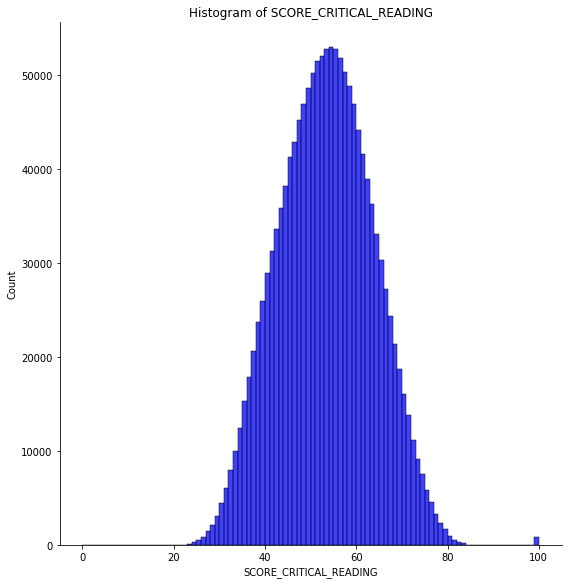

In [54]:
# Print histogram for SCORE_CRITICAL_READING
HistQuan('SCORE_CRITICAL_READING')

In [55]:
# Create function for Boxplots
def BoxQuan (variable):
    sns.boxplot(data = df_work[variable], color = 'b')
    plt.title('Box plot for '+ variable);

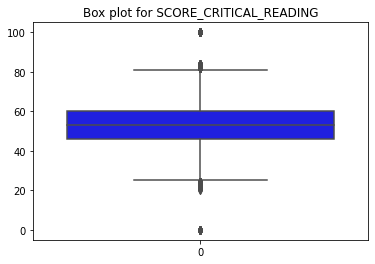

In [56]:
# Print boxplot for SCORE_CRITICAL_READING
BoxQuan('SCORE_CRITICAL_READING')

We can see a normal distribution for the critical reading score, with a mean of 52.91 and a median of 53.00 indicating a very low left-skewed behavior. The standard deviation is 10.32, which shows us how almost 95% of the students have scores between 35.26 and 73.55. The box plot shows how we have some points that can be considered outliers, points that are below or above the three standard deviations. The IQR is between 46 and 60 points, which tells us that 50% of the scores are in this range, which is visible in the histogram, we have a narrow distribution around the mean.

In [57]:
# Create function for QQ plots
def QQPlotQuan (variable):
    pplot(df_work, x= variable, y=gamma, kind='qq', height=6, aspect=1, display_kws={'identity':True})
    plt.title('QQ plot for ' + variable);

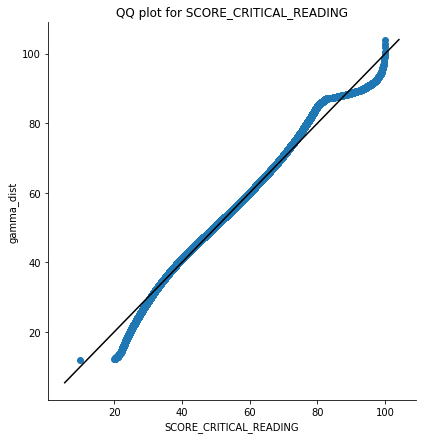

In [58]:
# Print QQ-Plot for SCORE_CRITICAL_READING  
QQPlotQuan('SCORE_CRITICAL_READING')

We can see how the critical reading score has a normal distribution for the mayority of the results, with some outliers below the 23 and above the 83 points.

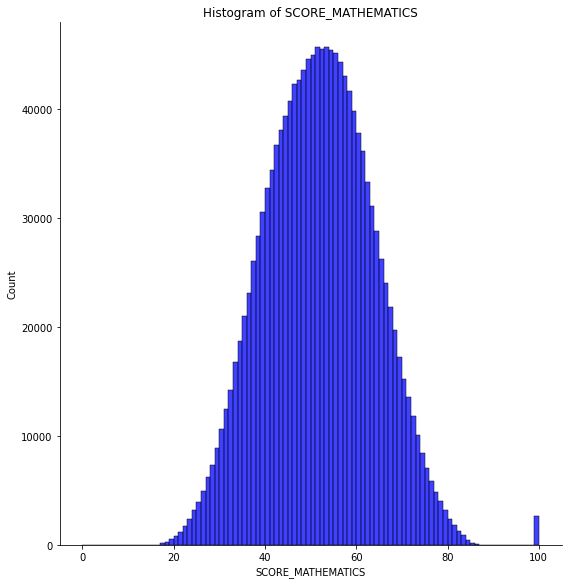

In [59]:
# Print histogram for SCORE_MATHEMATICS
HistQuan('SCORE_MATHEMATICS')

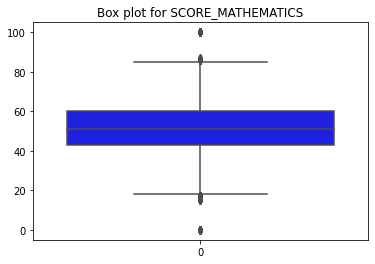

In [60]:
# Print boxplot for SCORE_MATHEMATICS
BoxQuan('SCORE_MATHEMATICS')

In the case of the mathematics score we can see how it has a normal distribution with a range between 0 and 100, a median of 51.00 and a mean of 51.41 points. In this case we can see a slightly skewed distribution to the right, with a higher number of outliers in the 100 points. Compared to the critical reading scores, we see a larger standard deviation, reflected in a wider IQR, and how the central statistics for mathematics are below those calculated for critical reading. We would need statistical tests to validate whether these differences in means are significant, but overall we can see that math scores are below those for critical reading.

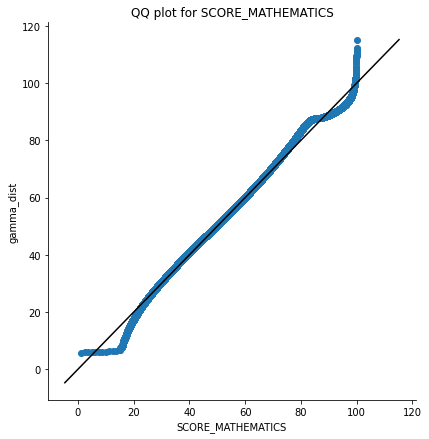

In [61]:
# Print QQ-Plot for SCORE_MATHEMATICS
QQPlotQuan('SCORE_MATHEMATICS')

We have a normal distribution with outliers in the two tails, with more cases with scores equal to 100 points.

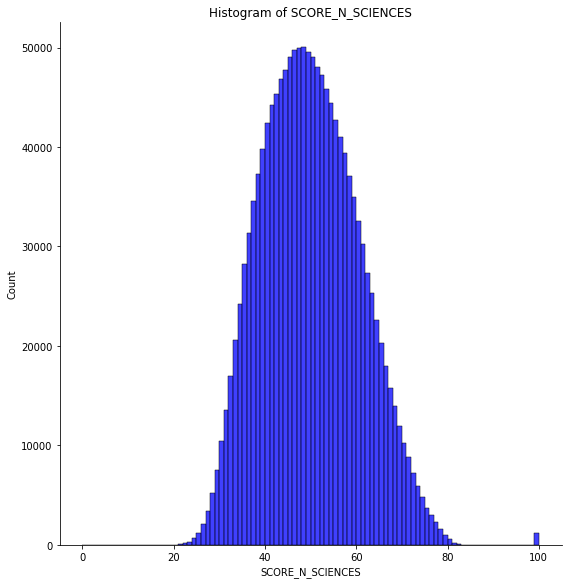

In [62]:
# Print histogram for SCORE_N_SCIENCES
HistQuan('SCORE_N_SCIENCES')

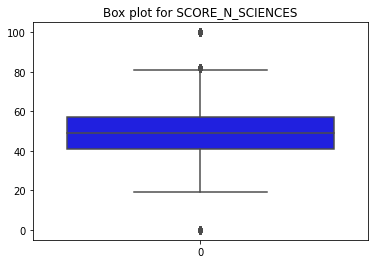

In [63]:
# Print boxplot for SCORE_N_SCIENCES
BoxQuan('SCORE_N_SCIENCES')

For natural sciences we can see lower scores than those recorded for critical reading and mathematics, this is shown in the histogram with a median of 49.00 and a mean equal to 49.48 points, being the first subject with these central statistics below 50 points. We have a normal distribution slightly skewed to the right, with an IQR between 41 and 57 points, a lower IQR than the other two subjects evaluated.

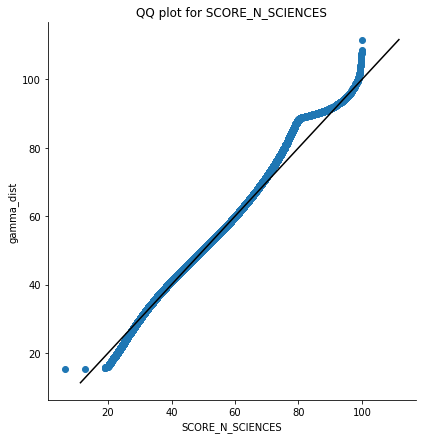

In [64]:
# Print QQ-Plot for SCORE_N_SCIENCES
QQPlotQuan('SCORE_N_SCIENCES')

Again we can see normal behavior, with outliers predominantly located in the highest scores.

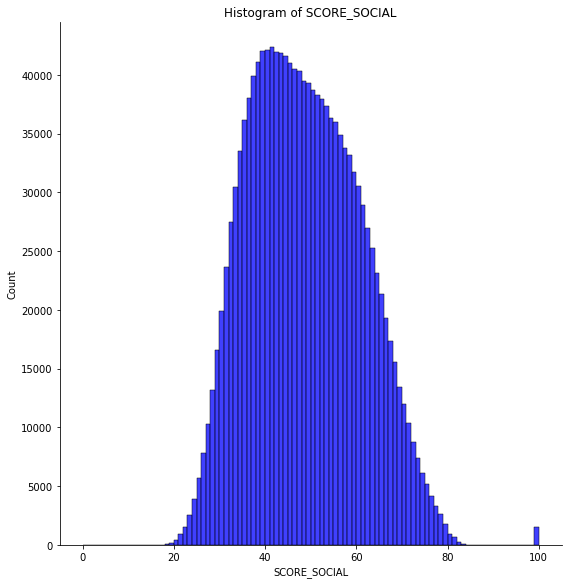

In [65]:
# Print histogram for SCORE_SOCIAL
HistQuan('SCORE_SOCIAL')

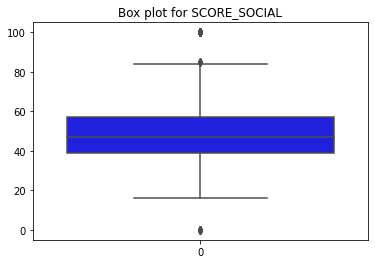

In [66]:
# Print boxplot for SCORE_SOCIAL
BoxQuan('SCORE_SOCIAL')

In this case we have a distribution that differs from being normal, it has a skewed behavior to the right more prevalent than the other subjects and a higher standard deviation. The mean and median scores are below the other subjects being 48.25 and 47.00 points correspondingly.

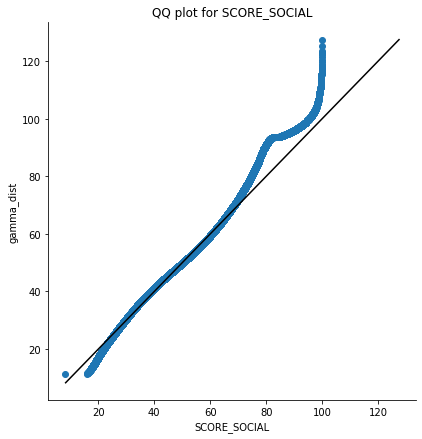

In [67]:
# Print QQ-Plot for SCORE_SOCIAL
QQPlotQuan('SCORE_SOCIAL')

The QQ plot shows how it differs from a normal distribution and the effect of outliers above 80 points.

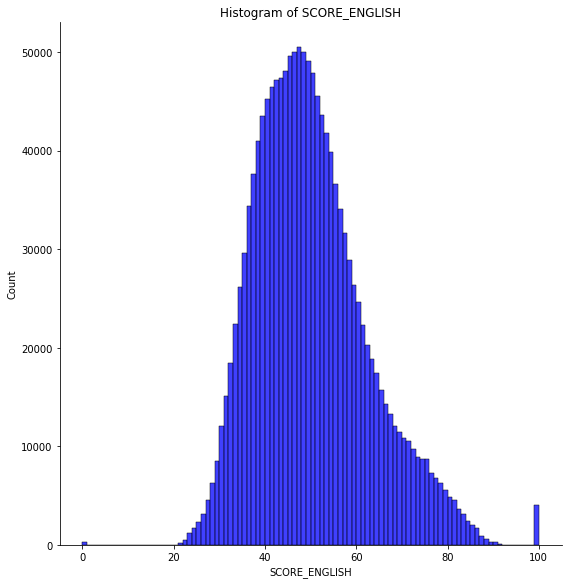

In [68]:
# Print histogram for SCORE_ENGLISH
HistQuan('SCORE_ENGLISH')

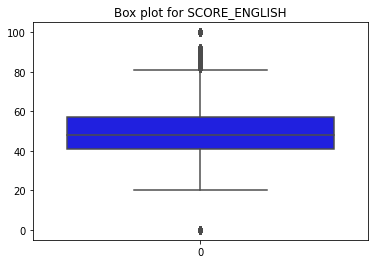

In [69]:
# Print boxplot for SCORE_ENGLISH
BoxQuan('SCORE_ENGLISH')

Here we have a non perfect normal distribution , it is right skewd with the presence of many values in the 100 points. The median values of the scores in the English subject is 48 (below 50 points that is the matemathic center) and a mean of 49.67. We have the greater standard devition for all the scores.

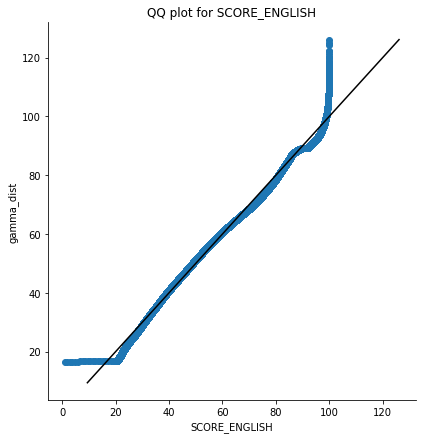

In [70]:
# Print QQ-Plot for SCORE_ENGLISH
QQPlotQuan('SCORE_ENGLISH')

The QQ plot allows us to see that the behavior of the normal distribution is affected by the outliers of the really bad and excellent scores.

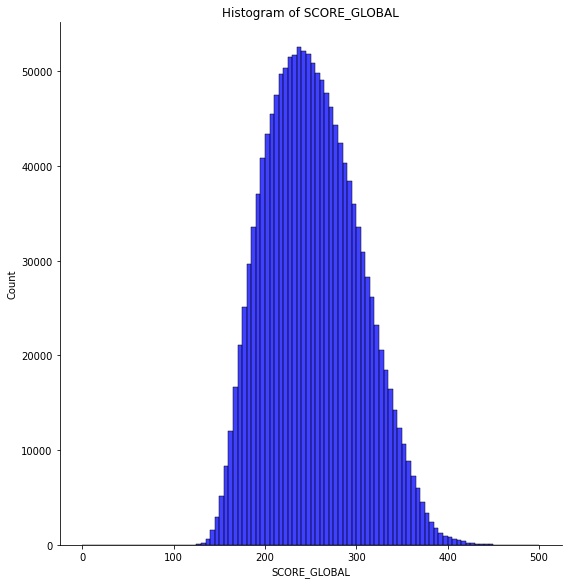

In [71]:
# Print histogram for SCORE_GLOBAL
HistQuan('SCORE_GLOBAL')

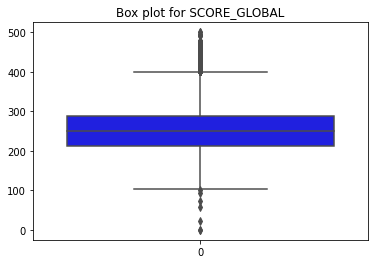

In [72]:
# Print boxplot for SCORE_GLOBAL
BoxQuan('SCORE_GLOBAL')

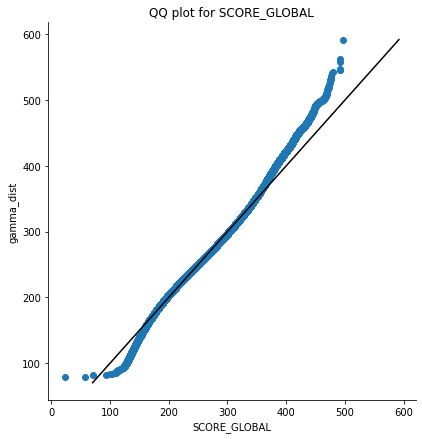

In [73]:
# Print QQ-Plot for SCORE_GLOBAL
QQPlotQuan('SCORE_GLOBAL')

For the global scores we have a rigth skew normal distribution, where the mean score is 252.25 and the a median of 249. It presents outliers in the two tails, but the mayor part are in the high scores. The 75% of the students have a score equal or lower that 288 points, which is only the 57.6% of the maximum possible score. The 95% percent of the students have a score between 150.6 and 353.83 points. 

#### Summary of the univariate analysis of the quantitative data 


If we were to create public education policies, we would have to prioritize those subjects in which we have the lowest results. The lowest results are obtained by students in the subject of social sciences, which is the subject with the worst results according to the central statistics, with an average result of 48.25 points and a median of 47, both below the mathematical possible center, which is 50 points. It also has one of the highest standard deviations. The other two subjects with the lowest scores are Natural Sciences and English, with very similar behaviors, with mean scores close to 49.5 points and a similar IQR, although the median is one point lower in English. 

The subject with the best results is Critical Reading, with a mean score of 52.91 points and the lowest standard deviation with 10.32. Mathematics ranks second with the best overall results, with a score that exceeds 51.4 points on average. Thus, although educational policies can be created to improve the scores obtained, they may have less impact if they are palliated in areas such as reading and mathematics, and it would be better to level the areas in which there is a greater deficiency on the part of the students, which are: Social Sciences, English and Natural Sciences, in that order. 

In global results we can target the student who have a a score below the mean (252.52) or below a standard deviation (201.46). To go deeper into this aspect we would need other data, perhaps to be able to make comparisons of the global scores obtained in other exams of the same type in other countries or an expected score or a goal to be reached.

In [74]:
# Here we start with the categorical values, to validate the composition of the demographic data.
plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]

# Create a function to graph barplots
def GraphBars (variable):
    per = df_work[variable].value_counts(0)
    g = sns.catplot(data = df_work, y = per.index, x = per*100/sum(per), kind = 'bar', orient = 'h',
                    order = df_work[variable].value_counts().index, height = 6, aspect = 1.3)
    plt.title('Percentage of observations per ' + variable + '\n')
    for p in g.ax.patches:
        txt = str(p.get_width().round(2)) + '%'
        txt_y = p.get_y() + 0.2
        txt_x = p.get_width()+0.3
        g.ax.text(txt_x,txt_y,txt)
    plt.show();
   # print('Quantities\n',per, '\n', 'Percentages\n', (per*100/sum(per)))

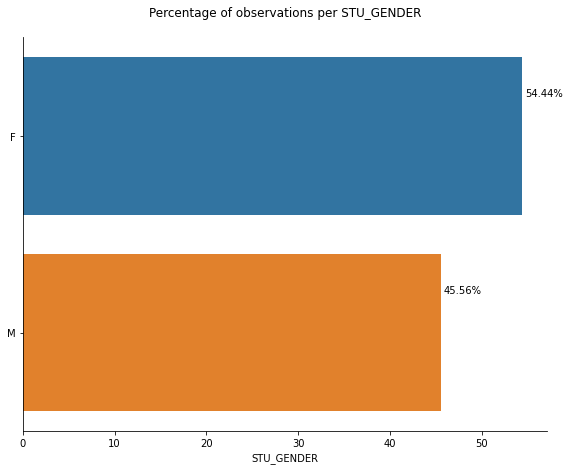

In [75]:
# See the gender distribution
GraphBars('STU_GENDER')

In the data we have a majority of female students with 54.44% of the total population and male students make up the remaining 45.56%.

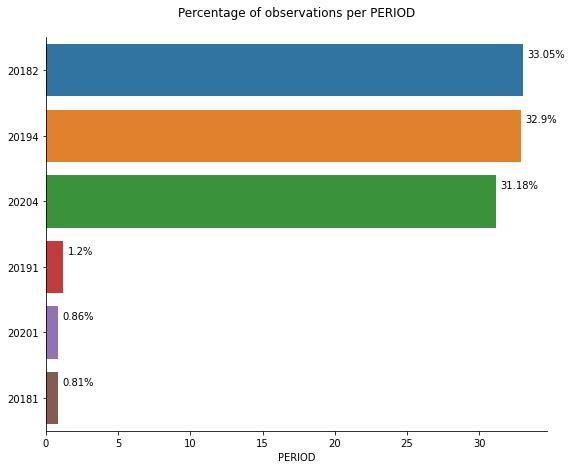

In [76]:
# See the period distribution
GraphBars('PERIOD')

We have to keep in mind that we do not have an equal distribution of values for all periods, 33% of the values are from period 2 of 2018, almost a third are from the fourth period of 2019, 31% are from the fourth period of 2020, and the rest is from the first period of 2018, 2019 and 2020.
So we can make the decision to transform the data and not reflect the period, only the year, due to the fact that the evidence presented in the first period is much less compared to the evidence taken in the other period of the year.

In [77]:
# Data transformation for PERIOD, just keeping the year and eliminating the period.
df_work['PERIOD'] = df_work['PERIOD'].replace({'20182':'2018', '20194':'2019', '20204':'2020', '20191':'2019', '20201':'2020', '20181':'2018'})

In [78]:
# PERIOD tranformation validation
df_work['PERIOD'].unique()

array(['2020', '2019', '2018'], dtype=object)

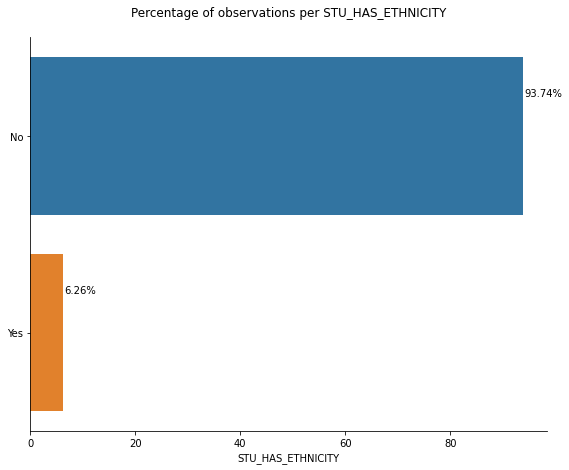

In [79]:
# See the ethnicity distribution
GraphBars('STU_HAS_ETHNICITY')

The 6.26% of the students that present the test from 2018 to 2020 have an ethnicity. 

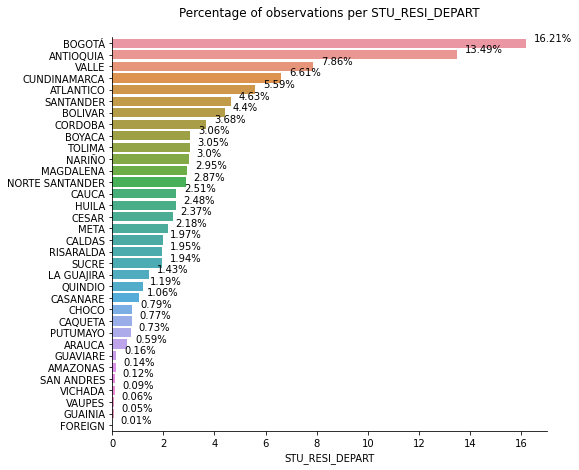

In [80]:
# See the residence department distribution
GraphBars('STU_RESI_DEPART')

Here we can see how most of the students reside in Bogotá (the capital of Colombia) with 16.21%, in second place is Antioquia with 13.49% of the students and how they are distributed in the other departments, including students residing abroad how are the minority. 

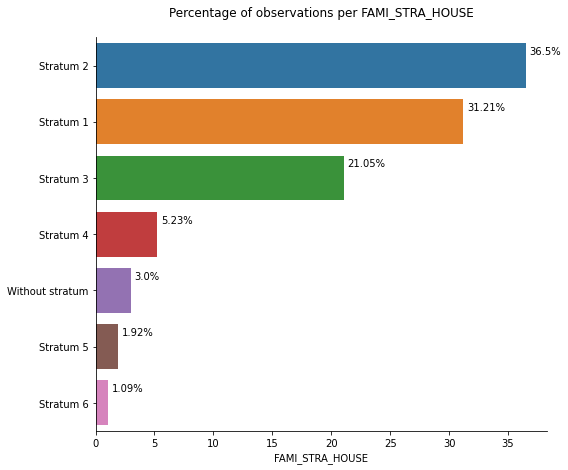

In [81]:
# See the familiy house stratum distribution
GraphBars('FAMI_STRA_HOUSE')

Thirty-six percent of the students belong to stratum 2, 31 percent to stratum 1 being these two strata the people in Colombia with the lowest income and highest population, coming to represent 67 percent of the overall student population. As expected, the higher the socioeconomic stratum, the less population belongs to each one, so stratum 6 only represents 1 percent of the students. The middle and upper middle class (strata 3 and 4) represent 26.29% of the population.

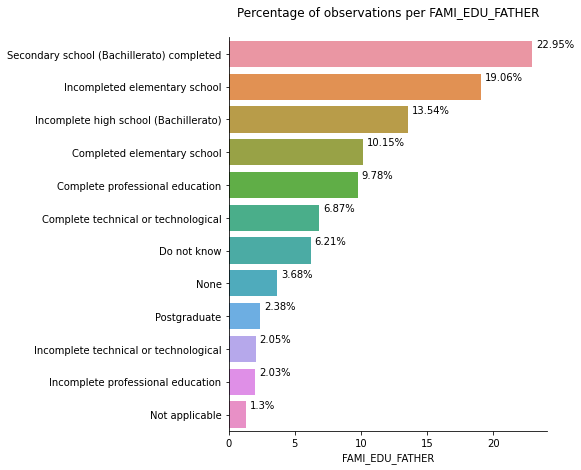

In [82]:
# See the father education distribution
GraphBars('FAMI_EDU_FATHER')

In the graph we can see how the majority of the students' parents have completed high school with almost 23 percent, while parents who have not completed high school or even elementary school total 32.6 percent. 

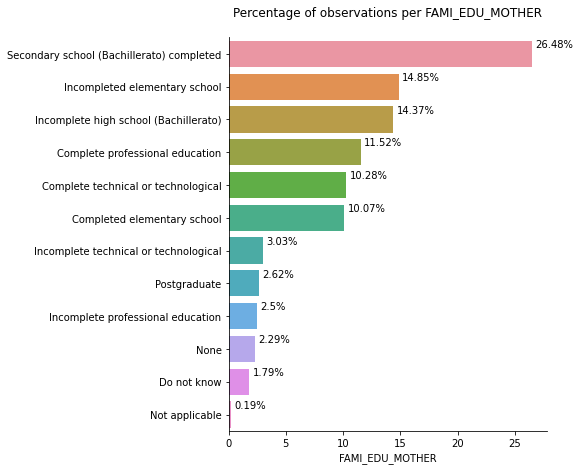

In [83]:
# See the mother education level distribution
GraphBars('FAMI_EDU_MOTHER')

In the distribution of the educational level of the mothers we can see how the majority of the mothers have completed high school (26.48%) in greater proportion than the fathers (22.95%), and have a lower percentage of those who have not completed primary or secondary school, for a total of 29.2. In general terms, the mothers of the students have a higher level of education than the fathers, this is visible in the percentage of mothers with a complete professional education (11.52%).

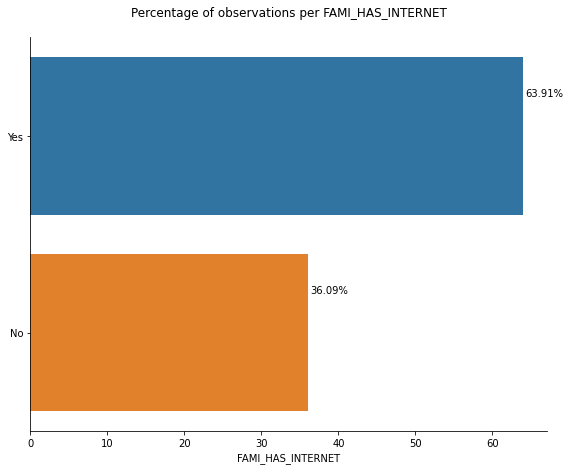

In [84]:
# See the family has internet distribution
GraphBars('FAMI_HAS_INTERNET')

Almost 64% of households have Internet service.

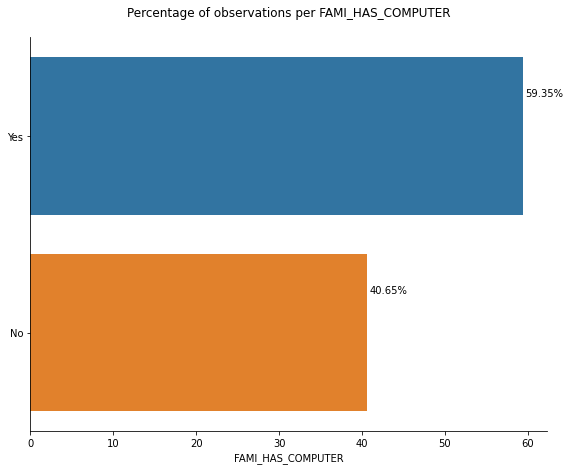

In [85]:
# See the family has computer distribution
GraphBars('FAMI_HAS_COMPUTER')

The 60% percent of the households have a personal computer.

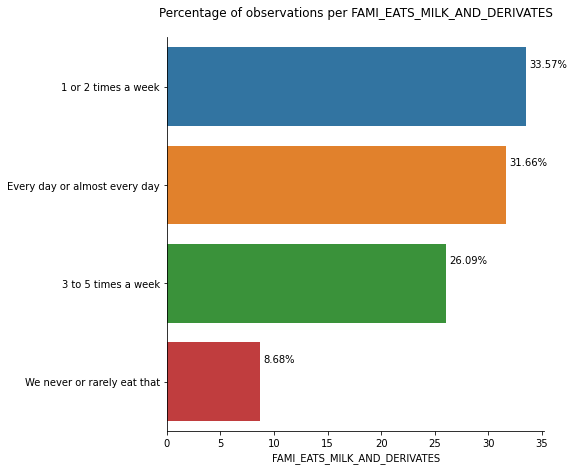

In [86]:
# See the distribution in the consumption of milk and its derivatives
GraphBars('FAMI_EATS_MILK_AND_DERIVATES')

More than one third of the students consume milk and its derivatives once or twice a week, while 31% consume them regularly, and only 8.68% do not include them in their diet.

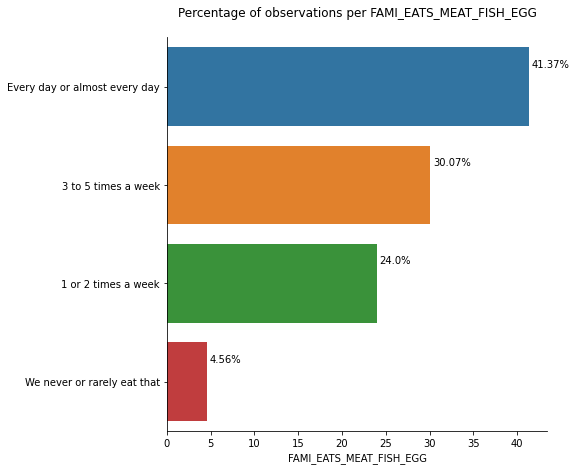

In [87]:
# See the distribution in the consumption of meat, fish and eggs
GraphBars('FAMI_EATS_MEAT_FISH_EGG')

The majority of students have a daily consumption of meat, fish or egg but this does not exceed 42%, 33% consume it on a regular basis of 3 or 5 times per week, while 4.56 never do so.

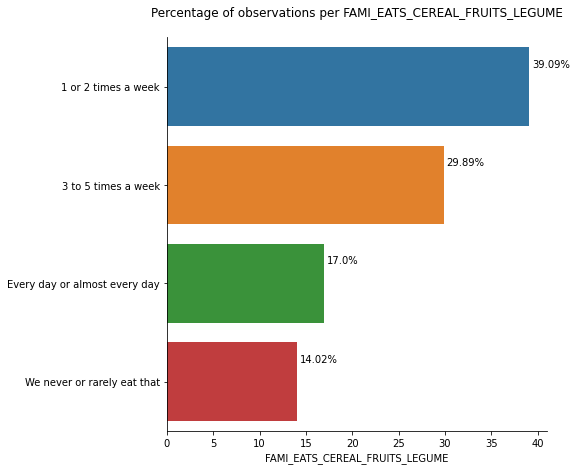

In [88]:
# See the distribution in the consumption of meat, fish and eggs
GraphBars('FAMI_EATS_CEREAL_FRUITS_LEGUME')

These data could be considered as worrying, 39% of students consume cereals, fruits or legumes only 1 or 2 times a week and 14% do not include these foods in their diet. Only 17% eat them every day.

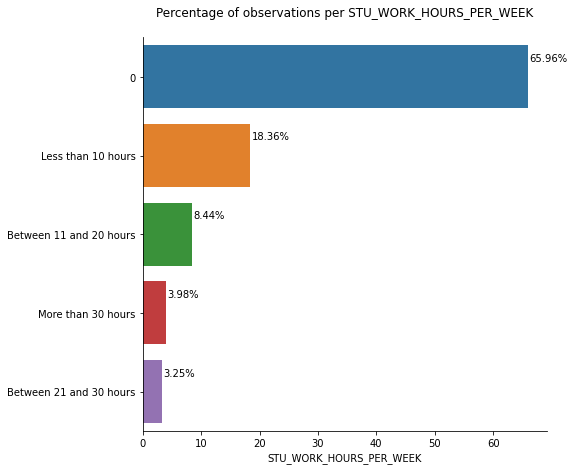

In [89]:
# See the distribution of the weekly worked hours for students
GraphBars('STU_WORK_HOURS_PER_WEEK')

Almost a 66 percent of student dont work, but the 33 percent remainig does it, the population of greatest concern are those working between 21 and 30 hours per week. We dont have the student age to validate if the working students are of legal age.

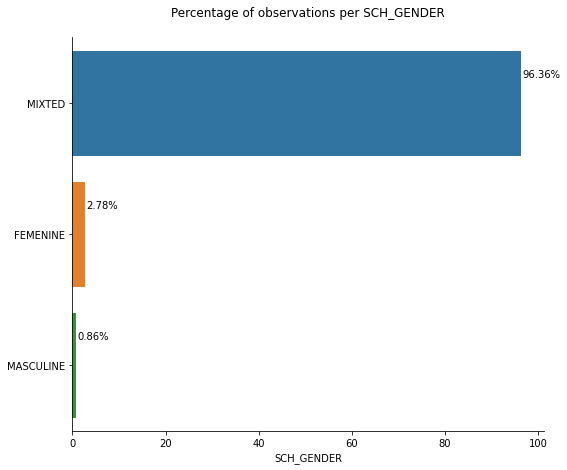

In [90]:
# See the distribution of the school gender
GraphBars('SCH_GENDER')

The big majority of students are from schools that are mixted gender, only the 2.78 are from femenine and 0.86 from a masculine school.

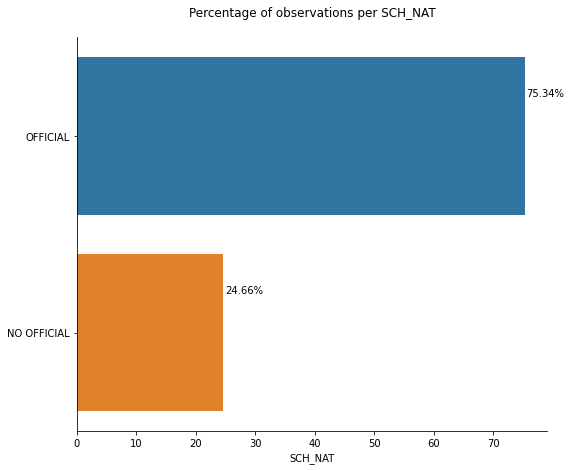

In [91]:
# See the distribution of the school nature
GraphBars('SCH_NAT')

As we can see in the bar graph, three quarters are students from official schools and the remaining 25% from unofficial schools.

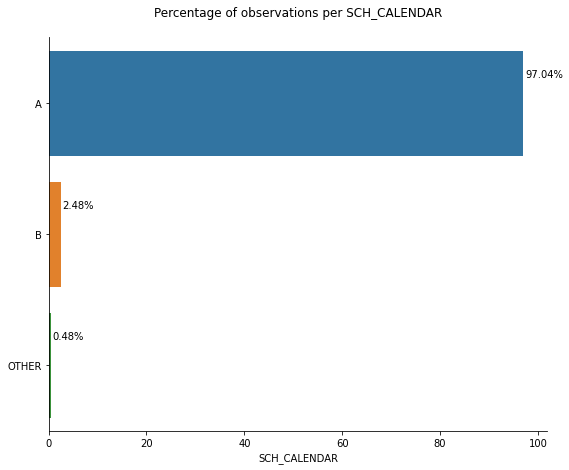

In [92]:
# See the distribution of the caldendar used for the school
GraphBars('SCH_CALENDAR')

The mayority of students came from schools that used the calendar A, that means that the study date starts in the month of February and ends in November, while just the 2.48% studies from september to june.

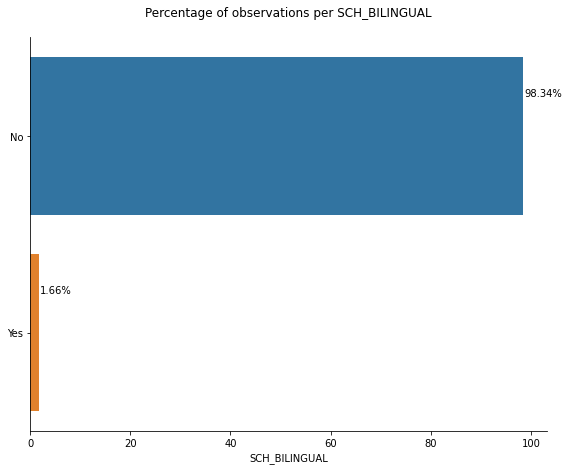

In [93]:
# See the distribution of the bilingual schools
GraphBars('SCH_BILINGUAL')

Only 1.66% of the students who took the test came from bilingual schools.

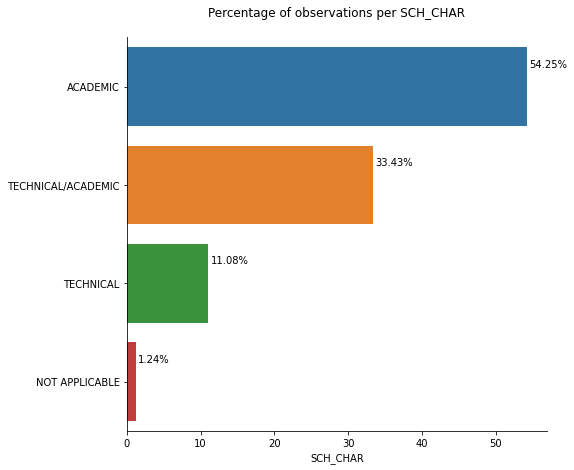

In [94]:
# See the distribution of the type of education or school characteristic 
GraphBars('SCH_CHAR')

Of the total number of students who sat for the exams, about 54% came from purely academic centers, while 44% had some technical component. 

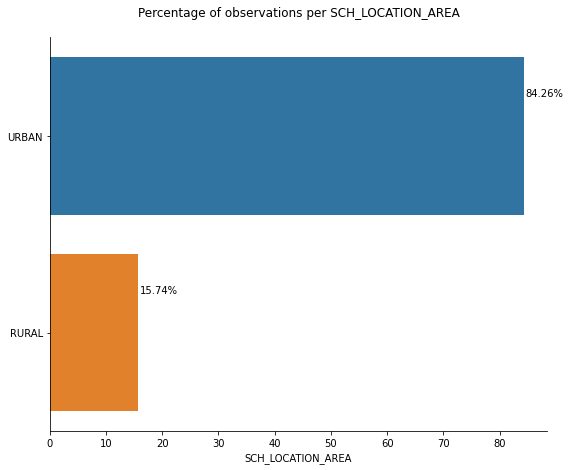

In [95]:
# See the distribution of the area location of the school 
GraphBars('SCH_LOCATION_AREA')

Eighty-four percent of the students come from urban schools and only 16% from rural schools.

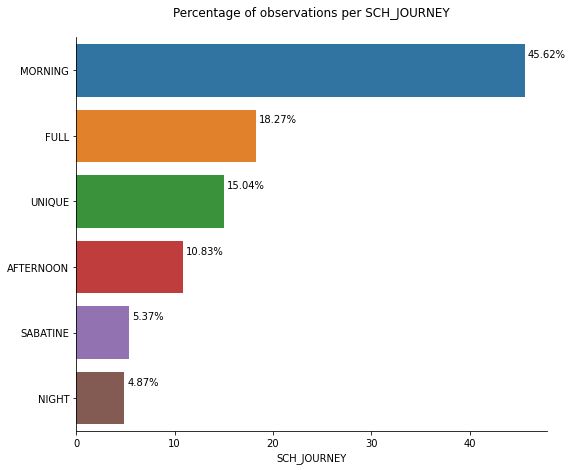

In [96]:
# See the distribution of the journy of the school 
GraphBars('SCH_JOURNEY')

In the barplot we can see the distribution of students for the journey they have, 45% study in the morning, 18.27% full time, 15% have a unique journey and almost 11% in the afternoon. And how a 11 percent study in days that normally obey accelerated education. 

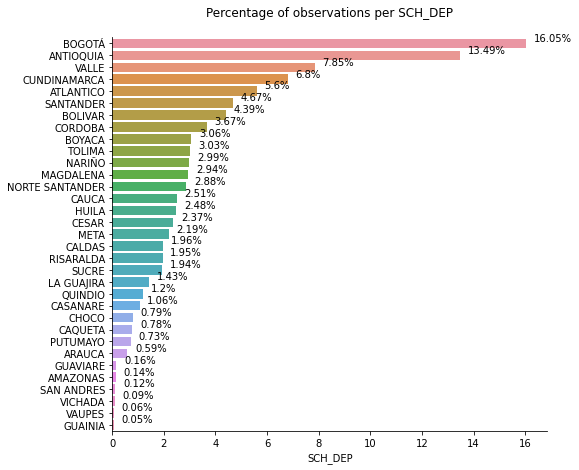

In [97]:
# See the distribution of the school department 
GraphBars('SCH_DEP')

As for the school department we have a similar distribution to the department of residence, perhaps these variables are correlated and we can work with only one of them.

In [98]:
# Now we need to establish the correlation between variables.
from dython import nominal

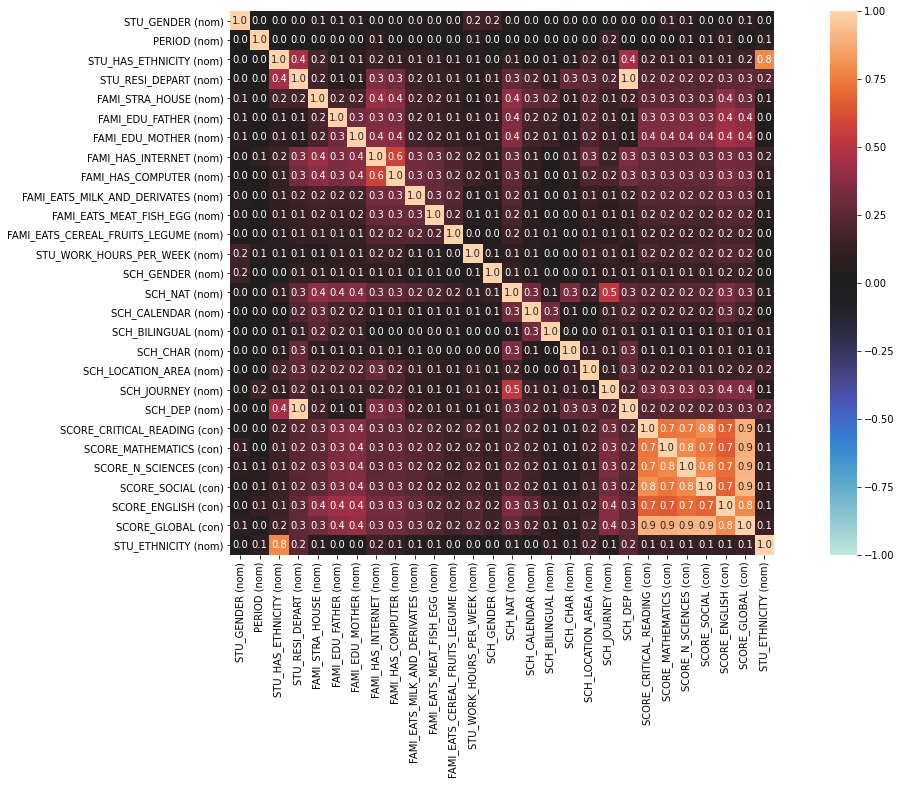

In [99]:
nominal.associations(df_work,figsize=(20,10),mark_columns=True, fmt='.1f');

In the correlation matrix we can see how some variables have a high correlation like: 

   * Student deparment residence and school deparment.
   * Student has ethnicity and student ethnicity.
    
These results were expected since the housing and school locations should be the same at least in terms of department, and the ethnicity variables are dependent. 
    
And we can see high correlations between our variables of interest, but not with variables than can be descriptors. The variables that have the higest correlation is 0.4, that cant be taken as a significant correlation. These variables are: 

   * FAMI_STRA_HOUSE with SCORE_ENGLISH
   * FAMI_EDU_FATHER with SCORE_ENGLISH and SCORE_GLOBAL
   * FAMI_EDU_MOTHER with ALL THE SCORES
   * SCH_JOURNEY with SCORE_ENGLISH and SCORE_GLOBAL
    
Therefore, the correlations between variables indicate that there is no relationship between the results and the demographic variables, so we will have to perform a validation through multivariate analysis, in which the variables that could have a correlation with the score are the family stratum, the educational level of the mother, the educational level of the father and the school day.

Another analysis that could be developed is to create an ML model, which could be a simple linear regression, to try to predict the student's score according to the demographic variables, validating the coefficients and the statistical significance of each of the variables in the result of the exam.

#### Multivariate analysis

In [100]:
# Create function for histograms
def Hist(score, variable):
    sns.displot(data = df_work, color = 'b', bins = 100, kind="hist", height = 8, x = score, hue = variable, 
               kde=True, alpha = 0.5)
    plt.title("Histogram of " + score + ' by ' + variable);  

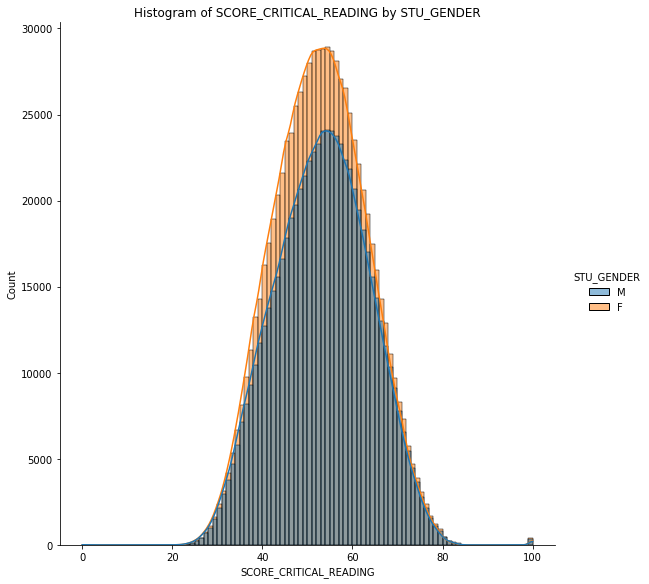

In [101]:
# Histogram of Critical Reading Score by Gender
Hist('SCORE_CRITICAL_READING', 'STU_GENDER')

In [102]:
# Create function for boxplots
def box(score, variable):
    ax = sns.boxplot(x= variable, y=score, data = df_work)
    plt.title('Boxplot for ' + score + ' by ' + variable)
    ax.tick_params(axis='x', labelrotation=90);

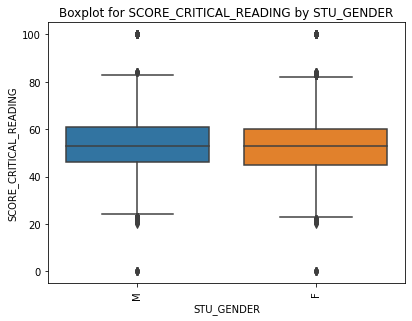

In [103]:
# Boxplot of Critical Reading Score by Gender
box('SCORE_CRITICAL_READING', 'STU_GENDER')

In [104]:
# Create function for central statistics summary
def sta (score, variable):
    print('Central statistics of ' + score + ' by ' + variable)
    print(df_work[{score,variable}].groupby(variable).describe());

In [105]:
# Central statistics of Critical Reading Score by Gender
sta('SCORE_CRITICAL_READING', 'STU_GENDER')

Central statistics of SCORE_CRITICAL_READING by STU_GENDER
           SCORE_CRITICAL_READING                                         \
                            count       mean        std  min   25%   50%   
STU_GENDER                                                                 
F                        789931.0  52.719832  10.219469  0.0  45.0  53.0   
M                        661095.0  53.144474  10.423392  0.0  46.0  53.0   

                         
             75%    max  
STU_GENDER               
F           60.0  100.0  
M           61.0  100.0  


In the histogram and boxplot we do not see a very different behavior of the critical reading score by gender, in the central statistic males have a higher score and standard deviation, but the mean difference is only 0.42 points.

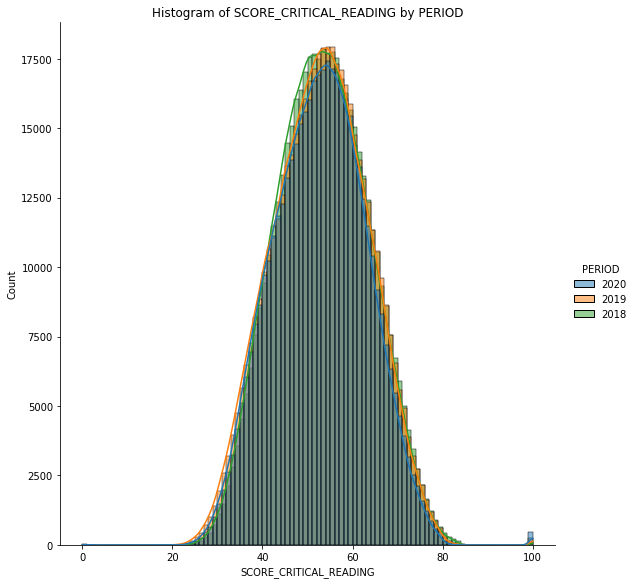

In [106]:
# Histogram of Critical Reading Score by Period
Hist('SCORE_CRITICAL_READING', 'PERIOD')

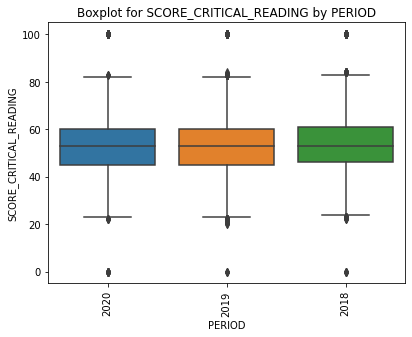

In [107]:
# Boxplot of Score Critical Reading by Period
box('SCORE_CRITICAL_READING', 'PERIOD')

In [108]:
# Central statistics of Critical Reading Score by Gender
sta('SCORE_CRITICAL_READING', 'PERIOD')

Central statistics of SCORE_CRITICAL_READING by PERIOD
       SCORE_CRITICAL_READING                                               \
                        count       mean        std  min   25%   50%   75%   
PERIOD                                                                       
2018                 491272.0  53.286108  10.170774  0.0  46.0  53.0  61.0   
2019                 494806.0  52.826932  10.553217  0.0  45.0  53.0  60.0   
2020                 464948.0  52.611303  10.197443  0.0  45.0  53.0  60.0   

               
          max  
PERIOD         
2018    100.0  
2019    100.0  
2020    100.0  


We see a mean difference in the critical reading score between years, indicating that the test results have been decreasing over the three years.

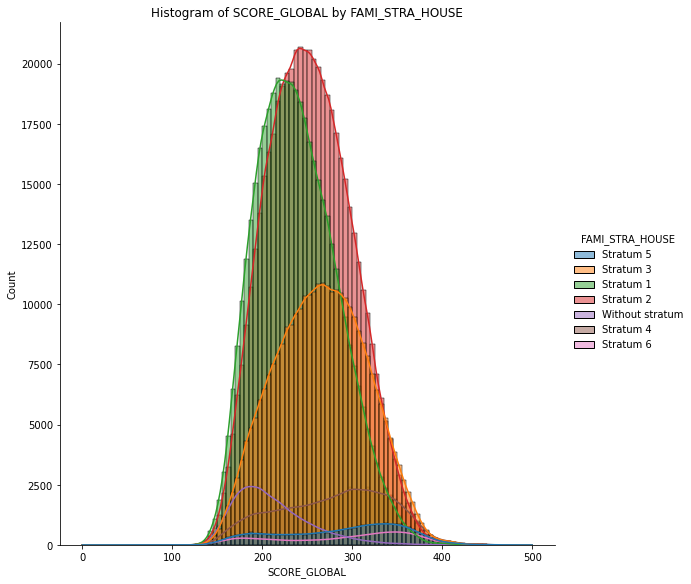

In [180]:
# Histogram of SCORE_GLOBAL by FAMI_STRA_HOUSE
Hist('SCORE_GLOBAL', 'FAMI_STRA_HOUSE')

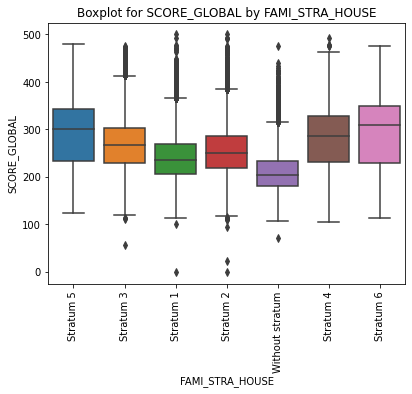

In [181]:
# Boxplot of SCORE_GLOBAL by FAMI_STRA_HOUSE
box('SCORE_GLOBAL', 'FAMI_STRA_HOUSE')

In [182]:
# Central statistics of SCORE_GLOBAL by FAMI_STRA_HOUSE
pd.options.display.max_rows = 10
sta('SCORE_GLOBAL', 'FAMI_STRA_HOUSE')

Central statistics of SCORE_GLOBAL by FAMI_STRA_HOUSE
                SCORE_GLOBAL                                              \
                       count        mean        std    min    25%    50%   
FAMI_STRA_HOUSE                                                            
Stratum 1           452886.0  238.662151  44.467207    0.0  205.0  235.0   
Stratum 2           529589.0  252.687086  46.873229    0.0  218.0  251.0   
Stratum 3           305458.0  265.436990  50.715839   57.0  228.0  266.0   
Stratum 4            75888.0  279.659432  61.246535  104.0  232.0  286.0   
Stratum 5            27886.0  287.900524  67.143871  123.0  234.0  300.0   
Stratum 6            15852.0  291.478993  72.623225  113.0  229.0  310.0   
Without stratum      43467.0  210.948007  41.881290   72.0  180.0  203.0   

                               
                   75%    max  
FAMI_STRA_HOUSE                
Stratum 1        269.0  500.0  
Stratum 2        285.0  500.0  
Stratum 3        302.0  4

As the social stratum increases, so does the global score obtained, for example, we can see how the average score of students in stratum one is 238.66, while those in stratum 6 obtain 291.47 points. The three subgroups with the worst performance from the lowest to the highest are:

   1. Without stratum, with a mean score of 210.94
   2. Stratum 1, with a mean score of 238.66
   3. Stratum 2, with a mean score of 252.68

Therefore, it is advisable to generate educational support policies for students who do not report stratum and those who belong to stratum 1 and 2, these three groups are the ones that historically have the lowest performances.

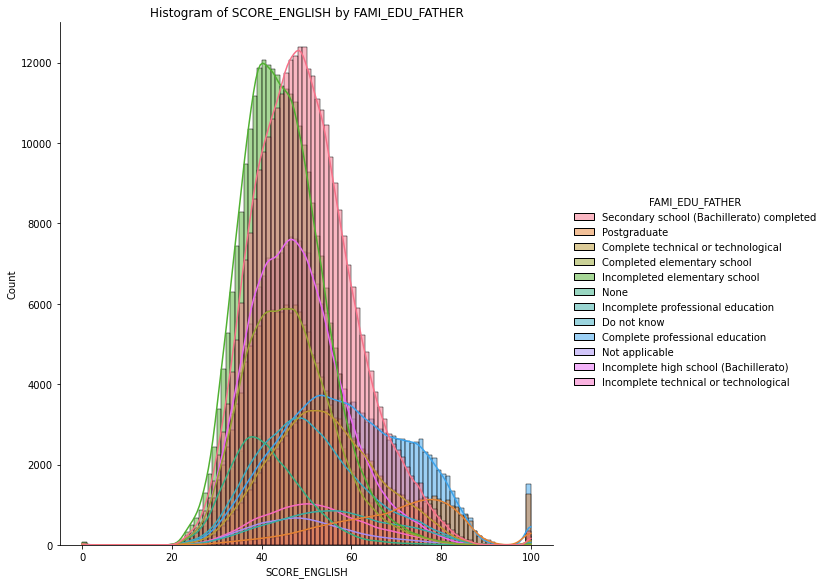

In [112]:
# Histogram of SCORE_ENGLISH by FAMI_EDU_FATHER
Hist('SCORE_ENGLISH', 'FAMI_EDU_FATHER')

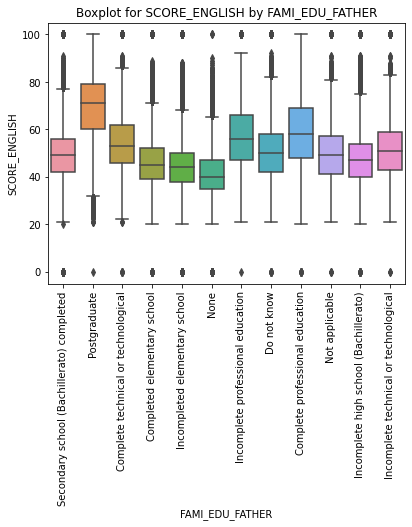

In [113]:
# Boxplot of SCORE_ENGLISH by FAMI_EDU_FATHER
box('SCORE_ENGLISH', 'FAMI_EDU_FATHER')

In [114]:
# Central statistics of SCORE_ENGLISH by FAMI_EDU_FATHER
pd.options.display.max_rows = 20
sta('SCORE_ENGLISH', 'FAMI_EDU_FATHER')

Central statistics of SCORE_ENGLISH by FAMI_EDU_FATHER
                                          SCORE_ENGLISH                        \
                                                  count       mean        std   
FAMI_EDU_FATHER                                                                 
Complete professional education                141870.0  58.611701  14.308757   
Complete technical or technological             99748.0  54.018186  11.974468   
Completed elementary school                    147299.0  45.944311   9.770930   
Do not know                                     90167.0  50.906673  12.125717   
Incomplete high school (Bachillerato)          196530.0  47.731802  10.465463   
Incomplete professional education               29484.0  56.414259  13.356099   
Incomplete technical or technological           29679.0  51.812292  11.731464   
Incompleted elementary school                  276581.0  44.666452   9.263784   
None                                            53348.

According to the histograms, boxplots and central statistics, we can see how there are different behaviors of the scores in the English subject, depending on the highest educational level reached by the student's father. In general, we can see that the higher the educational level of the father, the better the student's result in this test. The subgroups that perform worse according to the higher educational level of the father are:

1. None, with the lowest mean with 41.38 points.
2. Incompleted elementary school, with a mean score of 44.66.
3. Completed elementary school, with an average score of 45.94.
4. Incomplete high school, with a mean score of 47.73

Thus, when targeting support to students, the focus should be on those whose father did not complete high school, at least with regard to English. 

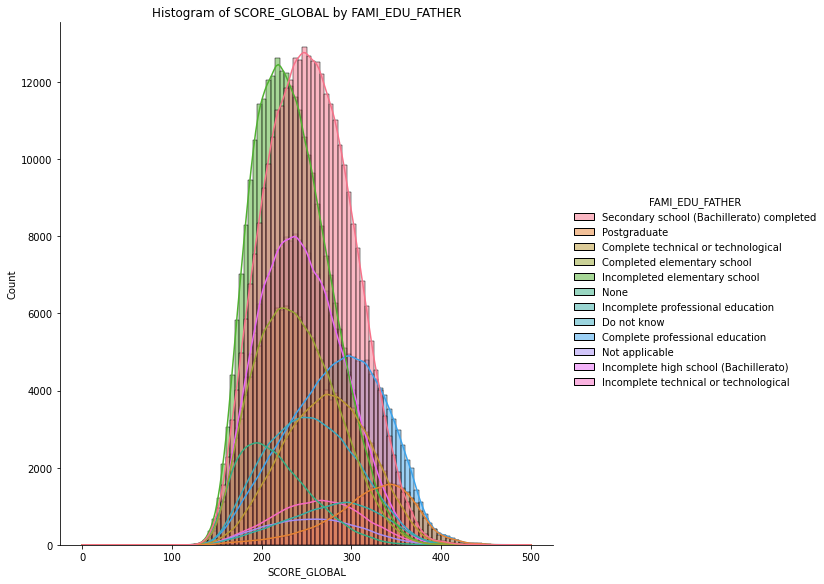

In [115]:
# Histogram of SCORE_GLOBAL by FAMI_EDU_FATHER
Hist('SCORE_GLOBAL', 'FAMI_EDU_FATHER')

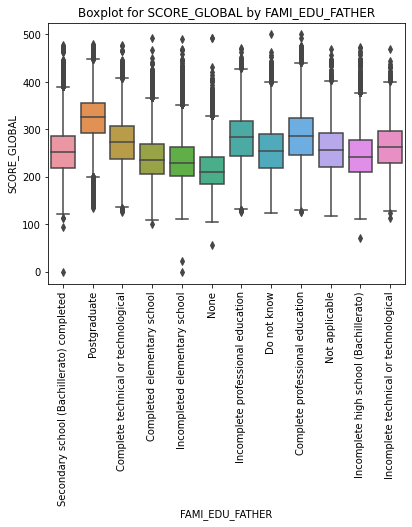

In [116]:
# Boxplot of SCORE_GLOBAL by FAMI_EDU_FATHER
box('SCORE_GLOBAL', 'FAMI_EDU_FATHER')

In [117]:
# Central statistics of SCORE_GLOBAL by FAMI_EDU_FATHER
pd.options.display.max_rows = 20
sta('SCORE_GLOBAL', 'FAMI_EDU_FATHER')

Central statistics of SCORE_GLOBAL by FAMI_EDU_FATHER
                                          SCORE_GLOBAL                         \
                                                 count        mean        std   
FAMI_EDU_FATHER                                                                 
Complete professional education               141870.0  283.332516  53.684015   
Complete technical or technological            99748.0  271.905331  47.665295   
Completed elementary school                   147299.0  238.890054  44.526872   
Do not know                                    90167.0  255.832666  49.229275   
Incomplete high school (Bachillerato)         196530.0  244.774457  45.679104   
Incomplete professional education              29484.0  279.351614  51.835389   
Incomplete technical or technological          29679.0  262.199131  47.936790   
Incompleted elementary school                 276581.0  233.737610  42.567259   
None                                           53348.0 

Examining the performance of the students according to the overall score obtained, taking into account the maximum educational level achieved by the father, we can see how the lower the educational level, the lower the average score on the 'Saber 11' test So the lowest average scores obtained are as follows:

1. None, with a mean of 215.66 2.
2. Incompleted elementary school, with 233.73 points.
3. Completed elementary school, with an average score of 238.89.
4. Incomplete high school, with 244.77 

Therefore, when generating student support policies, a higher priority should be given to those students who have fathers who have not attained a high school degree, given that they obtain the lowest total scores on average. 

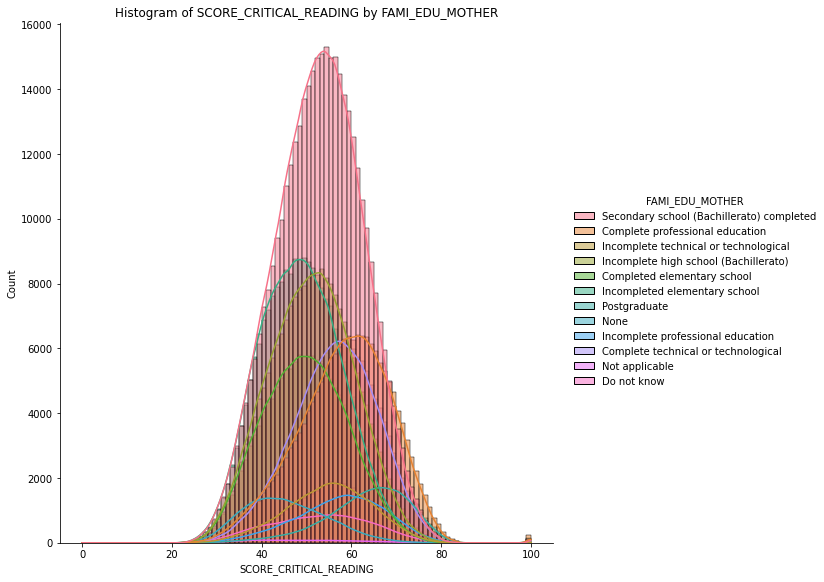

In [118]:
# Histogram of SCORE_CRITICAL_READING by FAMI_EDU_MOTHER
Hist('SCORE_CRITICAL_READING', 'FAMI_EDU_MOTHER')

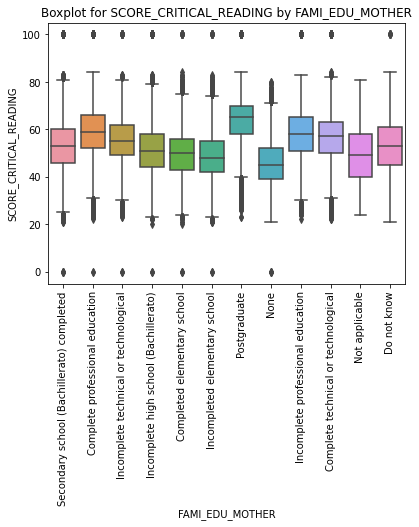

In [119]:
# Boxplot of SCORE_CRITICAL_READING by FAMI_EDU_MOTHER
box('SCORE_CRITICAL_READING', 'FAMI_EDU_MOTHER')

In [120]:
# Central statistics of SCORE_CRITICAL_READING by FAMI_EDU_MOTHER
pd.options.display.max_rows = 20
sta('SCORE_CRITICAL_READING', 'FAMI_EDU_MOTHER')

Central statistics of SCORE_CRITICAL_READING by FAMI_EDU_MOTHER
                                          SCORE_CRITICAL_READING             \
                                                           count       mean   
FAMI_EDU_MOTHER                                                               
Complete professional education                         167102.0  58.285514   
Complete technical or technological                     149171.0  56.302512   
Completed elementary school                             146142.0  49.720101   
Do not know                                              25930.0  52.984651   
Incomplete high school (Bachillerato)                   208572.0  51.086133   
Incomplete professional education                        36336.0  57.535695   
Incomplete technical or technological                    43950.0  54.944573   
Incompleted elementary school                           215452.0  48.705206   
None                                                     33235.0  4

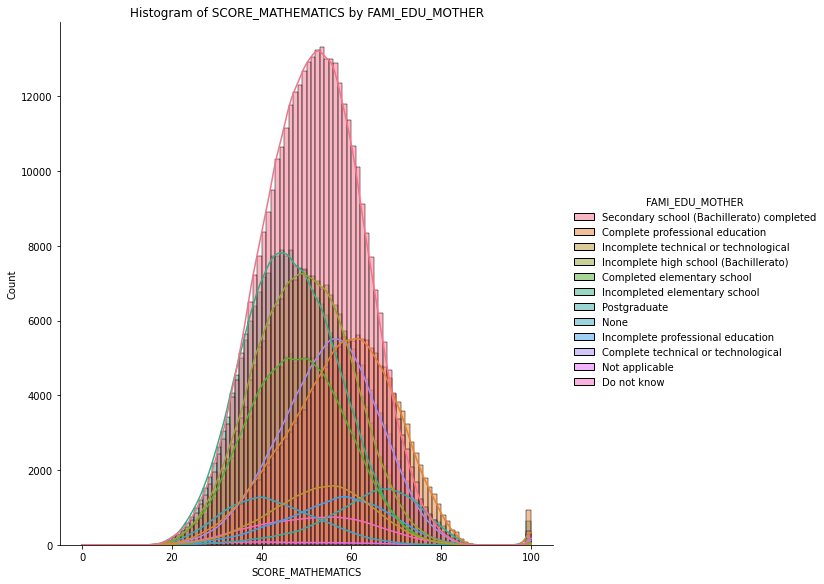

In [121]:
# Histogram of SCORE_MATHEMATICS by FAMI_EDU_MOTHER
Hist('SCORE_MATHEMATICS', 'FAMI_EDU_MOTHER')

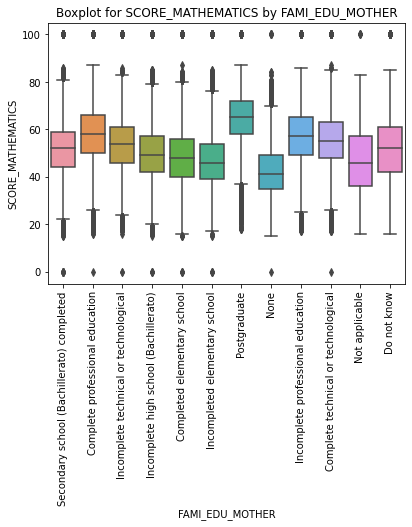

In [122]:
# Boxplot of SCORE_MATHEMATICS by FAMI_EDU_MOTHER
box('SCORE_MATHEMATICS', 'FAMI_EDU_MOTHER')

In [123]:
# Central statistics of SCORE_MATHEMATICS by FAMI_EDU_MOTHER
pd.options.display.max_rows = 20
sta('SCORE_MATHEMATICS', 'FAMI_EDU_MOTHER')

Central statistics of SCORE_MATHEMATICS by FAMI_EDU_MOTHER
                                          SCORE_MATHEMATICS             \
                                                      count       mean   
FAMI_EDU_MOTHER                                                          
Complete professional education                    167102.0  57.651195   
Complete technical or technological                149171.0  55.032144   
Completed elementary school                        146142.0  48.002949   
Do not know                                         25930.0  51.810104   
Incomplete high school (Bachillerato)              208572.0  49.316912   
Incomplete professional education                   36336.0  56.373101   
Incomplete technical or technological               43950.0  53.289670   
Incompleted elementary school                      215452.0  46.476566   
None                                                33235.0  42.378787   
Not applicable                                       

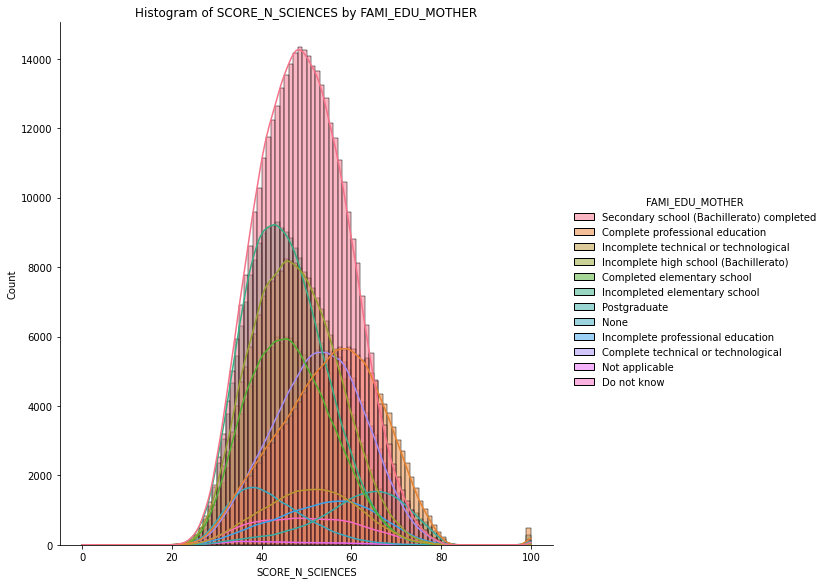

In [124]:
# Histogram of SCORE_N_SCIENCES by FAMI_EDU_MOTHER
Hist('SCORE_N_SCIENCES', 'FAMI_EDU_MOTHER')

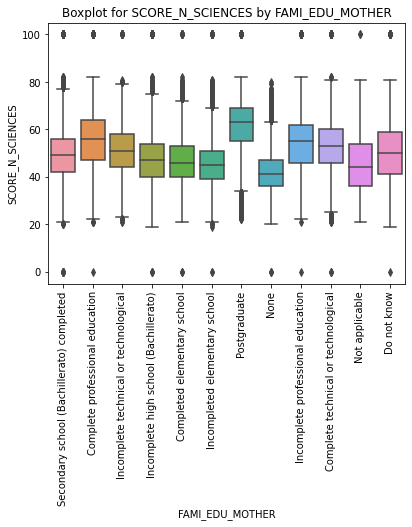

In [125]:
# Boxplot of SCORE_N_SCIENCES by FAMI_EDU_MOTHER
box('SCORE_N_SCIENCES', 'FAMI_EDU_MOTHER')

In [126]:
# Central statistics of SCORE_N_SCIENCES by FAMI_EDU_MOTHER
pd.options.display.max_rows = 20
sta('SCORE_N_SCIENCES', 'FAMI_EDU_MOTHER')

Central statistics of SCORE_N_SCIENCES by FAMI_EDU_MOTHER
                                          SCORE_N_SCIENCES             \
                                                     count       mean   
FAMI_EDU_MOTHER                                                         
Complete professional education                   167102.0  55.290816   
Complete technical or technological               149171.0  52.728955   
Completed elementary school                       146142.0  46.400480   
Do not know                                        25930.0  50.159236   
Incomplete high school (Bachillerato)             208572.0  47.490234   
Incomplete professional education                  36336.0  54.071527   
Incomplete technical or technological              43950.0  50.927190   
Incompleted elementary school                     215452.0  45.198188   
None                                               33235.0  41.761486   
Not applicable                                      2807.0  45.782

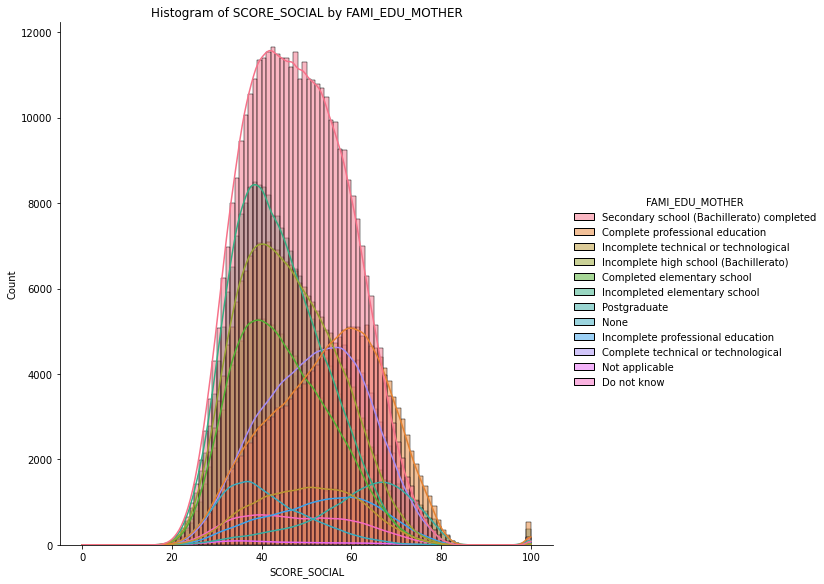

In [127]:
# Histogram of SCORE_SOCIAL by FAMI_EDU_MOTHER
Hist('SCORE_SOCIAL', 'FAMI_EDU_MOTHER')

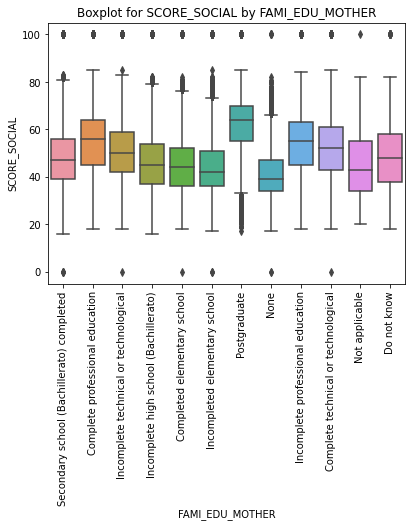

In [128]:
# Boxplot of SCORE_SOCIAL by FAMI_EDU_MOTHER
box('SCORE_SOCIAL', 'FAMI_EDU_MOTHER')

In [129]:
# Central statistics of SCORE_SOCIAL by FAMI_EDU_MOTHER
pd.options.display.max_rows = 20
sta('SCORE_SOCIAL', 'FAMI_EDU_MOTHER')

Central statistics of SCORE_SOCIAL by FAMI_EDU_MOTHER
                                          SCORE_SOCIAL                        \
                                                 count       mean        std   
FAMI_EDU_MOTHER                                                                
Complete professional education               167102.0  54.708501  12.675711   
Complete technical or technological           149171.0  52.060729  11.647840   
Completed elementary school                   146142.0  44.664381  10.729556   
Do not know                                    25930.0  48.167335  12.635943   
Incomplete high school (Bachillerato)         208572.0  45.888346  10.983665   
Incomplete professional education              36336.0  53.773971  12.297575   
Incomplete technical or technological          43950.0  50.194721  11.453606   
Incompleted elementary school                 215452.0  43.672154  10.280462   
None                                           33235.0  40.778306 

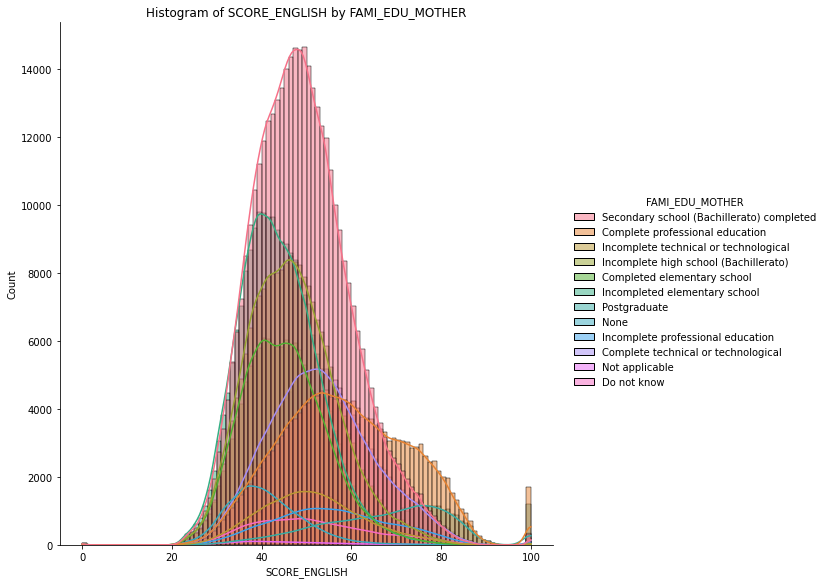

In [130]:
# Histogram of SCORE_ENGLISH by FAMI_EDU_MOTHER
Hist('SCORE_ENGLISH', 'FAMI_EDU_MOTHER')

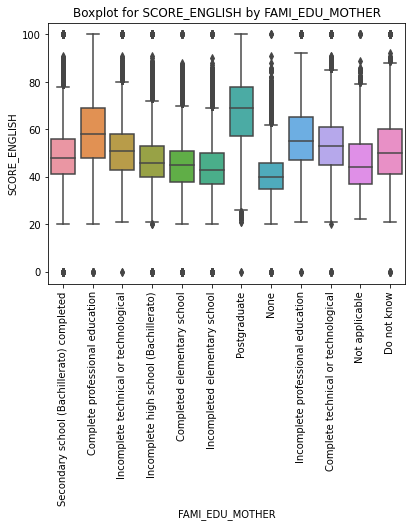

In [131]:
# Boxplot of SCORE_ENGLISH by FAMI_EDU_MOTHER
box('SCORE_ENGLISH', 'FAMI_EDU_MOTHER')

In [132]:
# Central statistics of SCORE_ENGLISH by FAMI_EDU_MOTHER
pd.options.display.max_rows = 20
sta('SCORE_ENGLISH', 'FAMI_EDU_MOTHER')

Central statistics of SCORE_ENGLISH by FAMI_EDU_MOTHER
                                          SCORE_ENGLISH                        \
                                                  count       mean        std   
FAMI_EDU_MOTHER                                                                 
Complete professional education                167102.0  58.438008  14.190276   
Complete technical or technological            149171.0  53.273357  11.740638   
Completed elementary school                    146142.0  45.141534   9.469852   
Do not know                                     25930.0  51.582954  13.500694   
Incomplete high school (Bachillerato)          208572.0  46.858495  10.028681   
Incomplete professional education               36336.0  56.016568  13.174183   
Incomplete technical or technological           43950.0  51.354198  11.436809   
Incompleted elementary school                  215452.0  43.872589   8.992435   
None                                            33235.

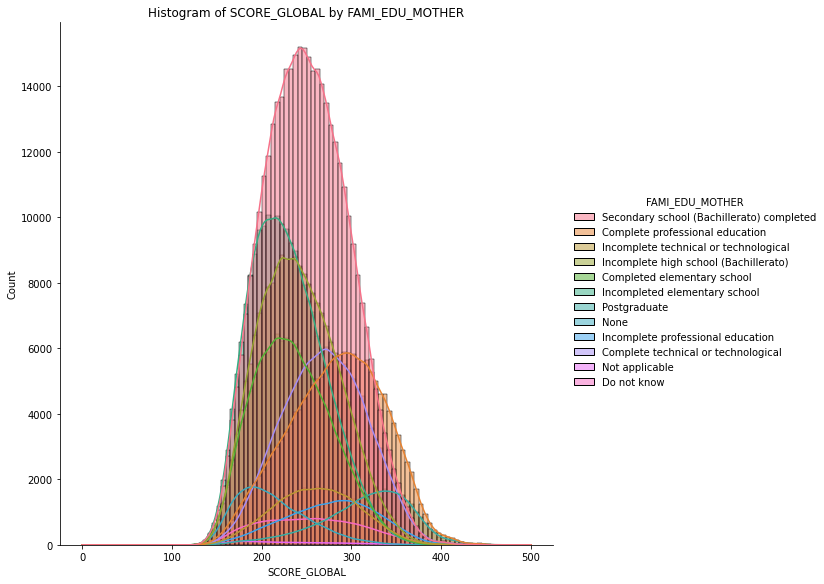

In [133]:
# Histogram of SCORE_GLOBAL by FAMI_EDU_MOTHER
Hist('SCORE_GLOBAL', 'FAMI_EDU_MOTHER')

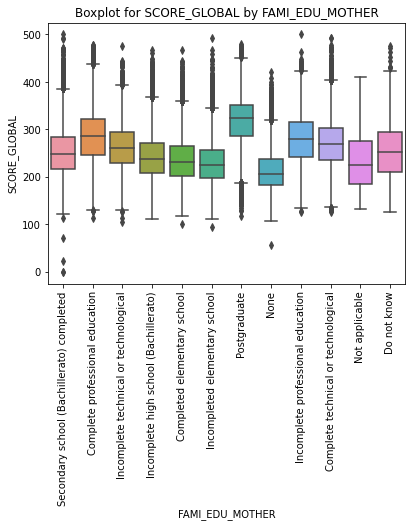

In [134]:
# Boxplot of SCORE_GLOBAL by FAMI_EDU_MOTHER
box('SCORE_GLOBAL', 'FAMI_EDU_MOTHER')

In [135]:
# Central statistics of SCORE_GLOBAL by FAMI_EDU_MOTHER
pd.options.display.max_rows = 20
sta('SCORE_GLOBAL', 'FAMI_EDU_MOTHER')

Central statistics of SCORE_GLOBAL by FAMI_EDU_MOTHER
                                          SCORE_GLOBAL                         \
                                                 count        mean        std   
FAMI_EDU_MOTHER                                                                 
Complete professional education               167102.0  283.171662  53.210243   
Complete technical or technological           149171.0  269.862802  46.763776   
Completed elementary school                   146142.0  235.195221  43.689931   
Do not know                                    25930.0  254.211300  54.667986   
Incomplete high school (Bachillerato)         208572.0  241.617106  44.340106   
Incomplete professional education              36336.0  277.413639  50.805228   
Incomplete technical or technological          43950.0  261.319090  46.482274   
Incompleted elementary school                 215452.0  229.242096  41.551588   
None                                           33235.0 

After reviewing the behavior of the scores, in each of the subjects and globally, according to the highest educational level attained by the mother, a clear pattern can be seen; the average score obtained in the tests is lower as the mother's educational level decreases, including those students who do not have a mother (not applicable). Therefore, it is advisable to focus student support policies on the following subgroups of students according to the mother's educational level:

1. None
2. Incompleted elementary school
3. Not applicable
4. Completed elementary school
5. Incomplete high school 

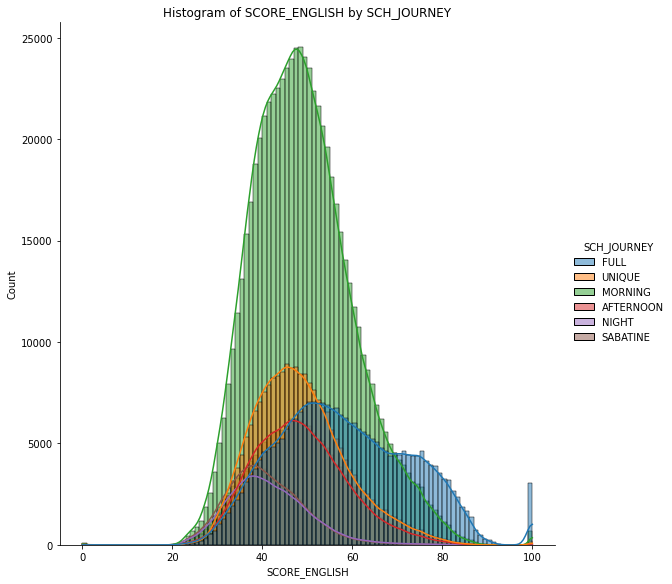

In [136]:
# Histogram of SCORE_ENGLISH by SCH_JOURNEY
Hist('SCORE_ENGLISH', 'SCH_JOURNEY')

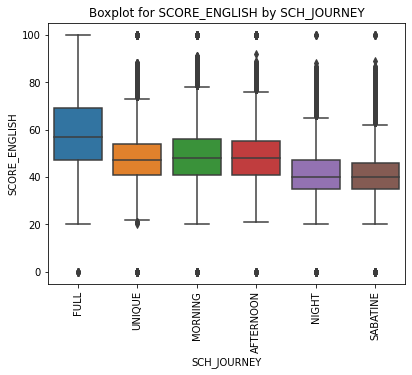

In [137]:
# Boxplot of SCORE_ENGLISH by SCH_JOURNEY
box('SCORE_ENGLISH', 'SCH_JOURNEY')

In [138]:
# Central statistics of SCORE_ENGLISH by SCH_JOURNEY
pd.options.display.max_rows = 20
sta('SCORE_ENGLISH', 'SCH_JOURNEY')

Central statistics of SCORE_ENGLISH by SCH_JOURNEY
            SCORE_ENGLISH                                                    
                    count       mean        std  min   25%   50%   75%    max
SCH_JOURNEY                                                                  
AFTERNOON        157196.0  48.498085  10.461056  0.0  41.0  48.0  55.0  100.0
FULL             265077.0  57.981537  14.700102  0.0  47.0  57.0  69.0  100.0
MORNING          661909.0  48.972226  11.110302  0.0  41.0  48.0  56.0  100.0
NIGHT             70691.0  41.426730   8.992788  0.0  35.0  40.0  47.0  100.0
SABATINE          77947.0  40.842316   8.679972  0.0  35.0  40.0  46.0  100.0
UNIQUE           218206.0  48.332479  10.418651  0.0  41.0  47.0  54.0  100.0


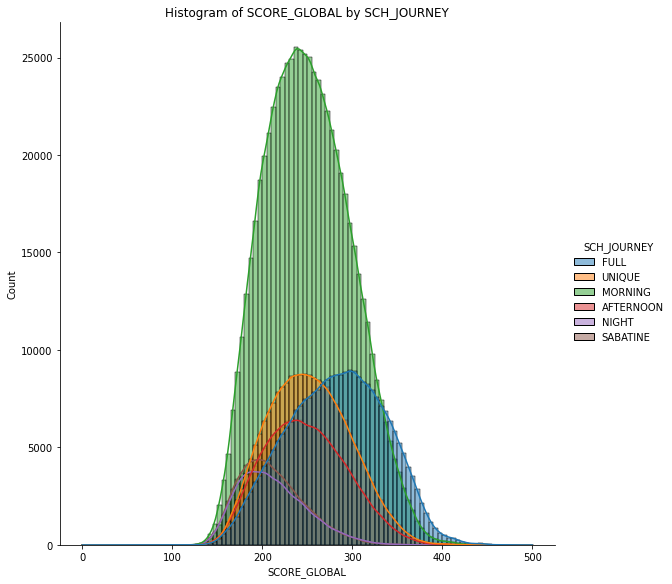

In [139]:
# Histogram of SCORE_GLOBAL by SCH_JOURNEY
Hist('SCORE_GLOBAL', 'SCH_JOURNEY')

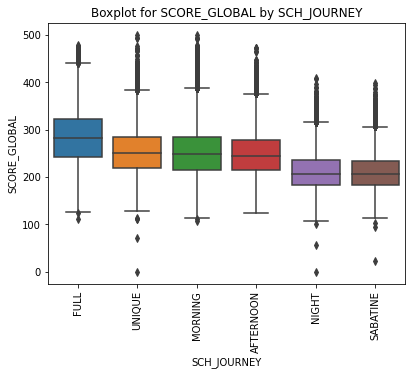

In [140]:
# Boxplot of SCORE_GLOBAL by SCH_JOURNEY
box('SCORE_GLOBAL', 'SCH_JOURNEY')

In [141]:
# Central statistics of SCORE_GLOBAL by SCH_JOURNEY
pd.options.display.max_rows = 20
sta('SCORE_GLOBAL', 'SCH_JOURNEY')

Central statistics of SCORE_GLOBAL by SCH_JOURNEY
            SCORE_GLOBAL                                                     \
                   count        mean        std    min    25%    50%    75%   
SCH_JOURNEY                                                                   
AFTERNOON       157196.0  247.937982  45.468854  125.0  214.0  245.0  279.0   
FULL            265077.0  282.066826  53.627955  112.0  243.0  283.0  322.0   
MORNING         661909.0  250.607629  47.814046  107.0  215.0  248.0  284.0   
NIGHT            70691.0  211.805011  37.863243    0.0  183.0  207.0  236.0   
SABATINE         77947.0  210.820378  36.456412   23.0  184.0  206.0  233.0   
UNIQUE          218206.0  252.049142  45.283723    0.0  218.0  250.0  284.0   

                    
               max  
SCH_JOURNEY         
AFTERNOON    473.0  
FULL         479.0  
MORNING      500.0  
NIGHT        409.0  
SABATINE     398.0  
UNIQUE       500.0  


From the behavior of the scores according to the type of day, we can establish that there are subgroups that have a similar behavior among themselves, and that there are notable differences between these groups, indicating that there may be better or worse results, depending of the study journey; and that therefore a single day should be applied at the national level.

- The first group that we can observe is the one formed by the Saturday and night shifts, which have very similar means and standard deviations, being the night shift the one with the best results, with an average score of 211.8 and a deviation of 37.8 points. These two shifts have the worst average performance.

- The other group that has very similar behaviors is the afternoon, morning and single shifts, which in that order have the worst to the best performance, with mean scores of 247.9, 250.6 and 253.0 points respectively.

- And the third group is that of full-day students, which is differentiated by having the best mean score of 282.0, and the best IQR ranging from 243 to 322 points, despite having the highest standard deviation. 

By way of conclusion, it can be said that the students who need more support are those of the irregular shifts (Saturday and evening), but that a change in student policy is advisable to adopt the full day at the national level, since they are the students who have the best results in average at the national level in the 'Saber 11' tests.

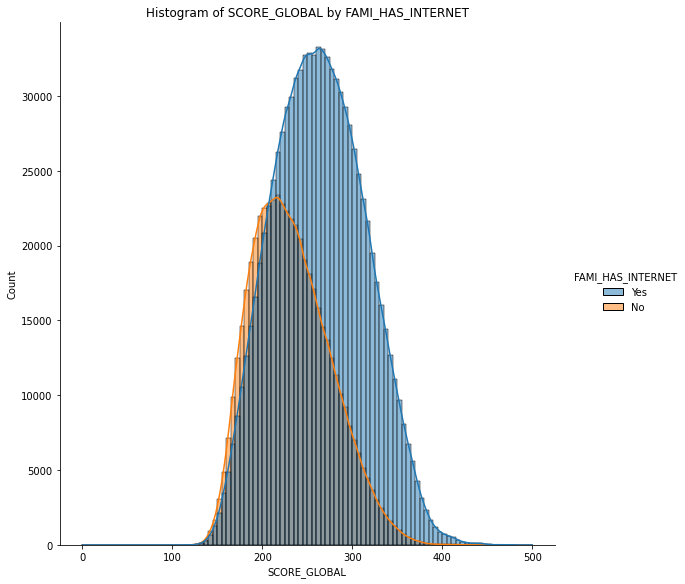

In [142]:
# Histogram of SCORE_GLOBAL by FAMI_HAS_INTERNET
Hist('SCORE_GLOBAL', 'FAMI_HAS_INTERNET')

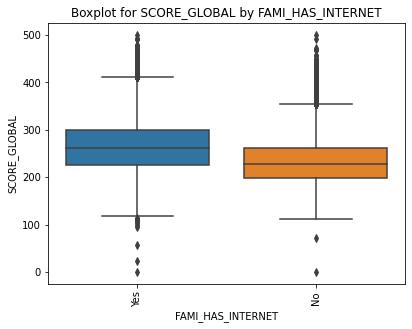

In [143]:
# Boxplot of SCORE_GLOBAL by FAMI_HAS_INTERNET
box('SCORE_GLOBAL', 'FAMI_HAS_INTERNET')

In [144]:
# Central statistics of SCORE_GLOBAL by FAMI_HAS_INTERNET
pd.options.display.max_rows = 100
sta('SCORE_GLOBAL', 'FAMI_HAS_INTERNET')

Central statistics of SCORE_GLOBAL by FAMI_HAS_INTERNET
                  SCORE_GLOBAL                                            \
                         count        mean        std  min    25%    50%   
FAMI_HAS_INTERNET                                                          
No                    523681.0  231.911440  43.572906  0.0  199.0  227.0   
Yes                   927345.0  263.742486  50.972433  0.0  226.0  262.0   

                                 
                     75%    max  
FAMI_HAS_INTERNET                
No                 261.0  500.0  
Yes                300.0  500.0  


We can indicate that students without internet access have worse average results than those who have internet at home, so education policies should encourage the use of internet for educational purposes and expand national coverage. On average, a student without internet has an overall score of 231.91 points, while one who has internet access has an average of 362.7 points.

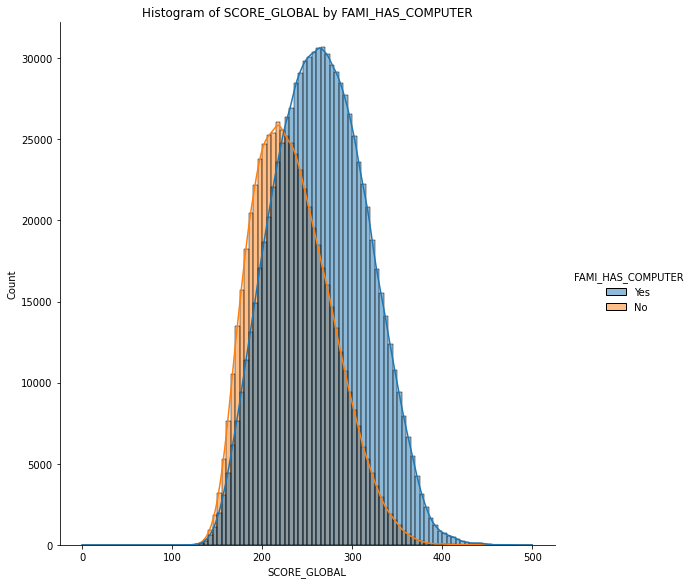

In [145]:
# Histogram of SCORE_GLOBAL by FAMI_HAS_COMPUTER
Hist('SCORE_GLOBAL', 'FAMI_HAS_COMPUTER')

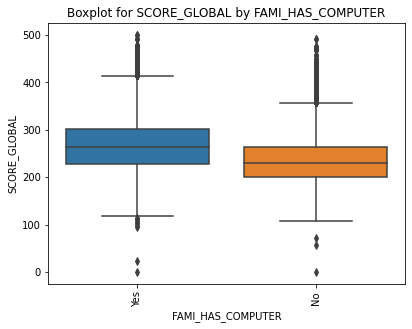

In [146]:
# Boxplot of SCORE_GLOBAL by FAMI_HAS_COMPUTER
box('SCORE_GLOBAL', 'FAMI_HAS_COMPUTER')

In [147]:
# Central statistics of SCORE_GLOBAL by FAMI_HAS_COMPUTER
pd.options.display.max_rows = 100
sta('SCORE_GLOBAL', 'FAMI_HAS_COMPUTER')

Central statistics of SCORE_GLOBAL by FAMI_HAS_COMPUTER
                  SCORE_GLOBAL                                            \
                         count        mean        std  min    25%    50%   
FAMI_HAS_COMPUTER                                                          
No                    589788.0  233.386702  43.798889  0.0  200.0  229.0   
Yes                   861238.0  265.175497  51.199287  0.0  227.0  264.0   

                                 
                     75%    max  
FAMI_HAS_COMPUTER                
No                 263.0  492.0  
Yes                302.0  500.0  


We see a very similar behavior to that of Internet access, students with computers at home have a better average result in the 'Saber 11' tests than their peers who do not have them. Therefore, policies that help students to have access to computers in schools or public policies that facilitate the purchase of these appliances by families should be created. Given that according to the test results, students with computers have an average score of 265.17 points and those without computers have an average score of 233.38 points.

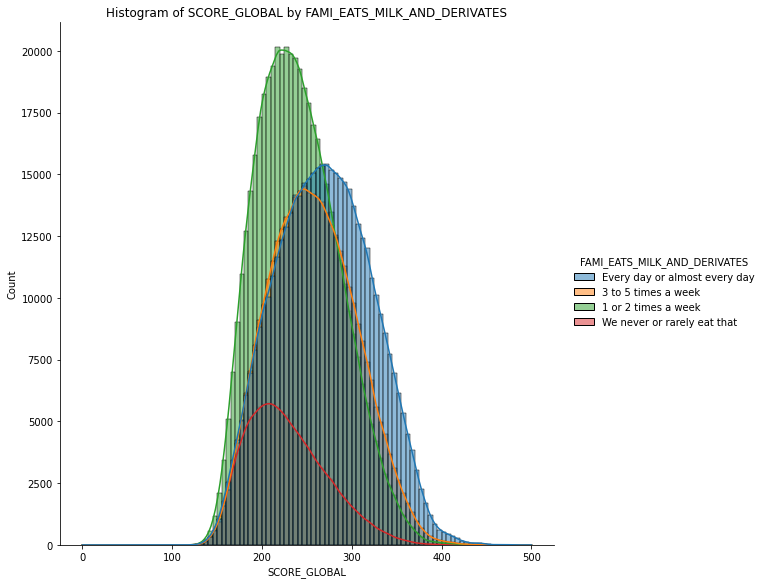

In [148]:
# Histogram of SCORE_GLOBAL by FAMI_EATS_MILK_AND_DERIVATES
Hist('SCORE_GLOBAL', 'FAMI_EATS_MILK_AND_DERIVATES')

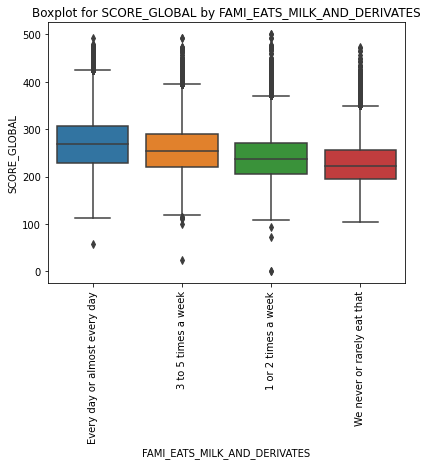

In [149]:
# Boxplot of SCORE_GLOBAL by FAMI_EATS_MILK_AND_DERIVATES
box('SCORE_GLOBAL', 'FAMI_EATS_MILK_AND_DERIVATES')

In [150]:
# Central statistics of SCORE_GLOBAL by FAMI_EATS_MILK_AND_DERIVATES
pd.options.display.max_rows = 100
sta('SCORE_GLOBAL', 'FAMI_EATS_MILK_AND_DERIVATES')

Central statistics of SCORE_GLOBAL by FAMI_EATS_MILK_AND_DERIVATES
                              SCORE_GLOBAL                                \
                                     count        mean        std    min   
FAMI_EATS_MILK_AND_DERIVATES                                               
1 or 2 times a week               487095.0  240.068459  45.730511    0.0   
3 to 5 times a week               378508.0  256.159101  48.374855   23.0   
Every day or almost every day     459467.0  268.672797  53.370748   57.0   
We never or rarely eat that       125956.0  227.755661  44.734514  104.0   

                                                           
                                 25%    50%    75%    max  
FAMI_EATS_MILK_AND_DERIVATES                               
1 or 2 times a week            205.0  236.0  271.0  500.0  
3 to 5 times a week            220.0  254.0  290.0  492.0  
Every day or almost every day  229.0  268.0  307.0  492.0  
We never or rarely eat that    194.0  22

When analyzing the differences in the overall scores by level of consumption of milk and milk products, we can see that students who consume these types of products on a daily basis have better results than those who do not or are not as constant in their consumption. Students who never or rarely consume them obtained average scores of 227.75 points, much lower than the 268.67 of those who do consume them on a daily basis. Therefore, policies should focus on students who do not consume milk and milk products on a daily basis, as well as on including these foods in school diets and facilitating access to these types of foods in the basic food basket of families.

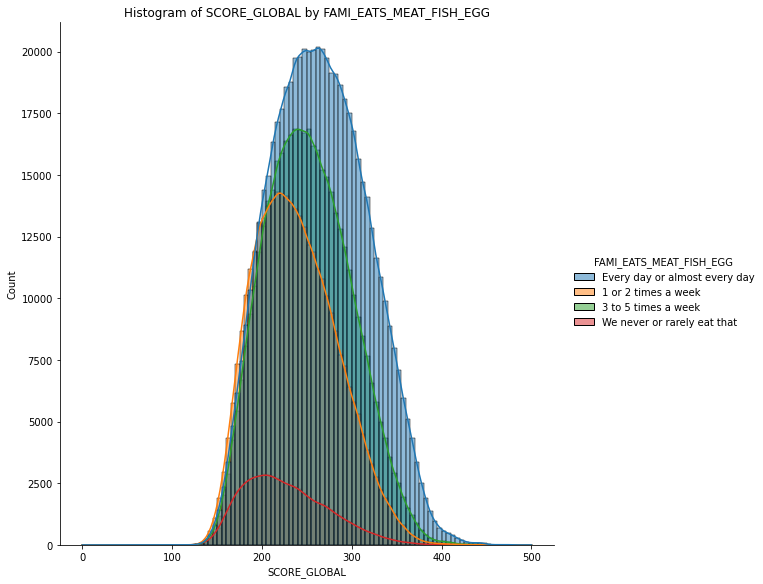

In [151]:
# Histogram of SCORE_GLOBAL by FAMI_EATS_MEAT_FISH_EGG
Hist('SCORE_GLOBAL', 'FAMI_EATS_MEAT_FISH_EGG')

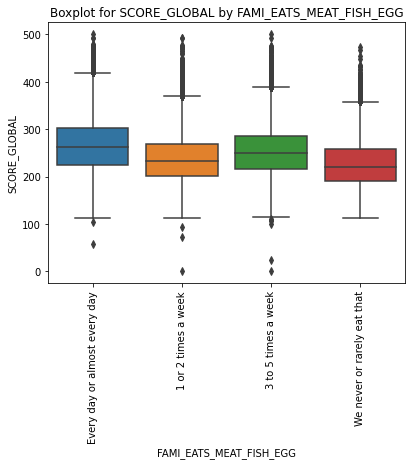

In [152]:
# Boxplot of SCORE_GLOBAL by FAMI_EATS_MEAT_FISH_EGG
box('SCORE_GLOBAL', 'FAMI_EATS_MEAT_FISH_EGG')

In [153]:
# Central statistics of SCORE_GLOBAL by FAMI_EATS_MEAT_FISH_EGG
pd.options.display.max_rows = 100
sta('SCORE_GLOBAL', 'FAMI_EATS_MEAT_FISH_EGG')

Central statistics of SCORE_GLOBAL by FAMI_EATS_MEAT_FISH_EGG
                              SCORE_GLOBAL                                \
                                     count        mean        std    min   
FAMI_EATS_MEAT_FISH_EGG                                                    
1 or 2 times a week               348298.0  237.468378  45.841748    0.0   
3 to 5 times a week               436334.0  251.553246  47.584814    0.0   
Every day or almost every day     600246.0  264.095014  52.852263   57.0   
We never or rarely eat that        66148.0  227.292133  46.724941  113.0   

                                                           
                                 25%    50%    75%    max  
FAMI_EATS_MEAT_FISH_EGG                                    
1 or 2 times a week            202.0  233.0  269.0  492.0  
3 to 5 times a week            216.0  249.0  285.0  500.0  
Every day or almost every day  224.0  262.0  302.0  500.0  
We never or rarely eat that    191.0  221.0  

The level of consumption of meat, fish or eggs shows a differentiated behavior, evidencing that students who consume these products on a daily basis obtain better average (and median) results than those who do not consume them or those who do not do so in such a constant manner. The higher the consumption of these products, the better results are obtained in the 'Saber 11' test.

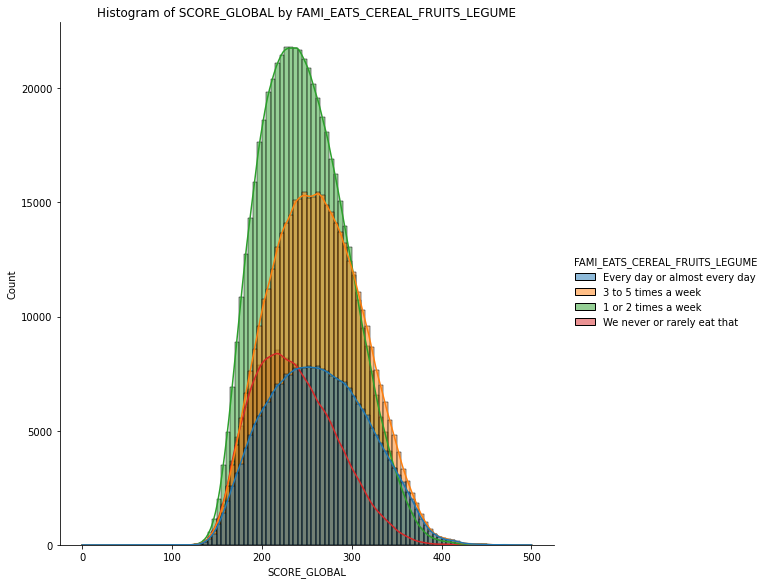

In [154]:
# Histogram of SCORE_GLOBAL by FAMI_EATS_CEREAL_FRUITS_LEGUME
Hist('SCORE_GLOBAL', 'FAMI_EATS_CEREAL_FRUITS_LEGUME')

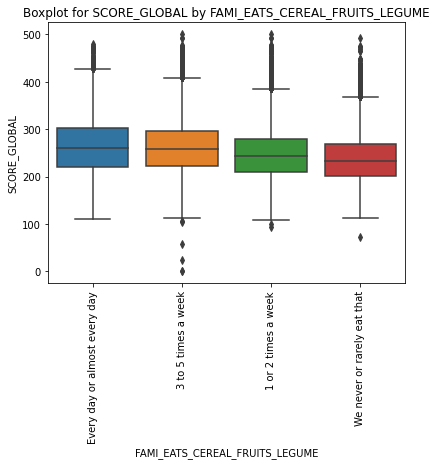

In [155]:
# Boxplot of SCORE_GLOBAL by FAMI_EATS_CEREAL_FRUITS_LEGUME
box('SCORE_GLOBAL', 'FAMI_EATS_CEREAL_FRUITS_LEGUME')

In [156]:
# Central statistics of SCORE_GLOBAL by FAMI_EATS_CEREAL_FRUITS_LEGUME
pd.options.display.max_rows = 100
sta('SCORE_GLOBAL', 'FAMI_EATS_CEREAL_FRUITS_LEGUME')

Central statistics of SCORE_GLOBAL by FAMI_EATS_CEREAL_FRUITS_LEGUME
                               SCORE_GLOBAL                                \
                                      count        mean        std    min   
FAMI_EATS_CEREAL_FRUITS_LEGUME                                              
1 or 2 times a week                567189.0  246.832086  48.043054   94.0   
3 to 5 times a week                433752.0  260.824268  50.871027    0.0   
Every day or almost every day      246603.0  262.799475  55.190406  111.0   
We never or rarely eat that        203482.0  236.321935  46.097489   72.0   

                                                            
                                  25%    50%    75%    max  
FAMI_EATS_CEREAL_FRUITS_LEGUME                              
1 or 2 times a week             210.0  243.0  280.0  500.0  
3 to 5 times a week             223.0  259.0  297.0  500.0  
Every day or almost every day   220.0  261.0  303.0  479.0  
We never or rarely eat th

As we have seen with the consumption of other foods, students who have a daily consumption of cereals and legumes also obtain better average results, in this case the difference seems to be smaller, but it exists and should therefore be taken into account when considering policies to support students.

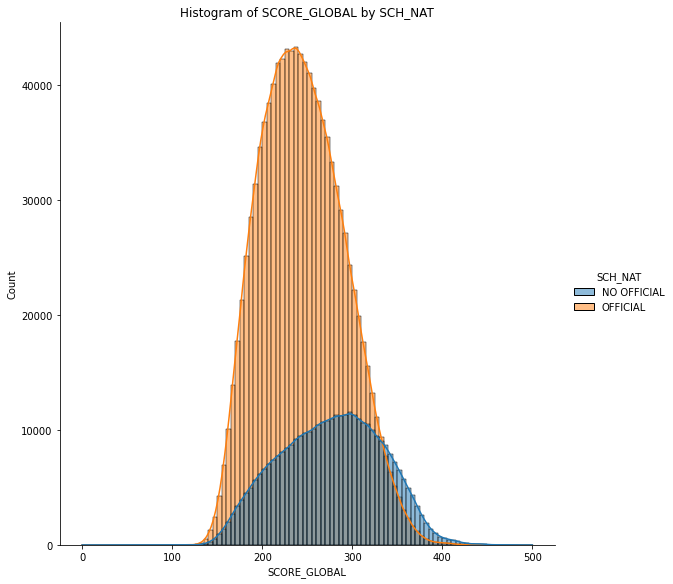

In [157]:
# Histogram of SCORE_GLOBAL by SCH_NAT
Hist('SCORE_GLOBAL', 'SCH_NAT')

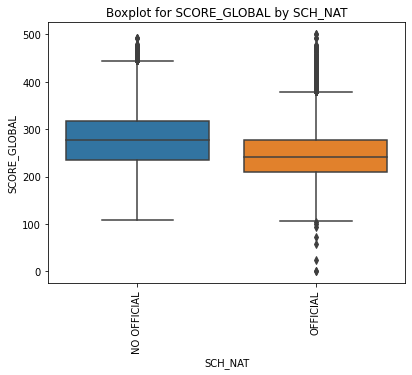

In [158]:
# Boxplot of SCORE_GLOBAL by SCH_NAT
box('SCORE_GLOBAL', 'SCH_NAT')

In [159]:
# Central statistics of SCORE_GLOBAL by SCH_NAT
pd.options.display.max_rows = 100
sta('SCORE_GLOBAL', 'SCH_NAT')

Central statistics of SCORE_GLOBAL by SCH_NAT
            SCORE_GLOBAL                                                     \
                   count        mean        std    min    25%    50%    75%   
SCH_NAT                                                                       
NO OFFICIAL     357884.0  276.123437  56.154060  108.0  234.0  278.0  318.0   
OFFICIAL       1093142.0  244.440092  46.302663    0.0  209.0  242.0  277.0   

                    
               max  
SCH_NAT             
NO OFFICIAL  492.0  
OFFICIAL     500.0  


There is a difference in the overall scores by nature of the school, those that are unofficial have a better performance than those that are official, so this difference has to be taken into account to level the education of official schools.  On average, the scores obtained by the official schools are lower by 22 points.

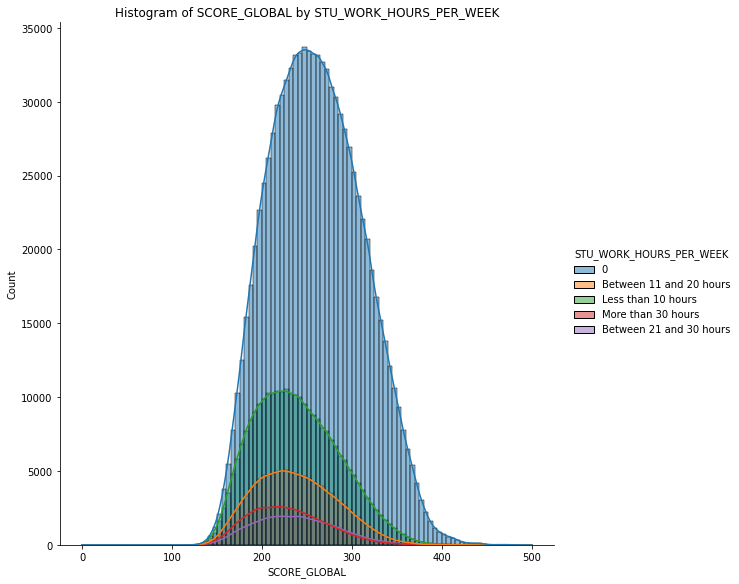

In [160]:
# Histogram of SCORE_GLOBAL by STU_WORK_HOURS_PER_WEEK
Hist('SCORE_GLOBAL', 'STU_WORK_HOURS_PER_WEEK')

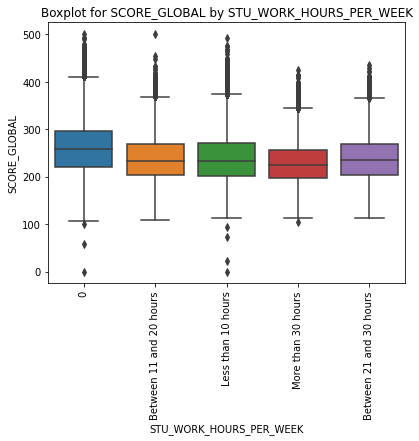

In [161]:
# Boxplot of SCORE_GLOBAL by STU_WORK_HOURS_PER_WEEK
box('SCORE_GLOBAL', 'STU_WORK_HOURS_PER_WEEK')

In [162]:
# Central statistics of SCORE_GLOBAL by STU_WORK_HOURS_PER_WEEK
pd.options.display.max_rows = 100
sta('SCORE_GLOBAL', 'STU_WORK_HOURS_PER_WEEK')

Central statistics of SCORE_GLOBAL by STU_WORK_HOURS_PER_WEEK
                        SCORE_GLOBAL                                       \
                               count        mean        std    min    25%   
STU_WORK_HOURS_PER_WEEK                                                     
0                           957152.0  260.167915  51.316097    0.0  221.0   
Between 11 and 20 hours     122508.0  237.514097  45.114962  108.0  203.0   
Between 21 and 30 hours      47160.0  236.976272  44.281355  113.0  203.0   
Less than 10 hours          266447.0  238.505643  47.298163    0.0  202.0   
More than 30 hours           57759.0  228.282346  42.282525  104.0  197.0   

                                              
                           50%    75%    max  
STU_WORK_HOURS_PER_WEEK                       
0                        258.0  297.0  500.0  
Between 11 and 20 hours  234.0  269.0  500.0  
Between 21 and 30 hours  235.0  268.0  436.0  
Less than 10 hours       234.0  271.0  

The fact that a student works has negative effects on the score obtained in the 'Saber 11' exam, those who do not have to work have average scores of 206 points but the group that works up to 30 hours a week, have an average score that ranges between 236.97 and 238.50 points, but even more critical, those students who work more than 30 hours a week have average scores of 228.28, that is about 32 points less than those who do not work. So efforts should be focused on students who work, even more so if they work more than 30 hours a day. 

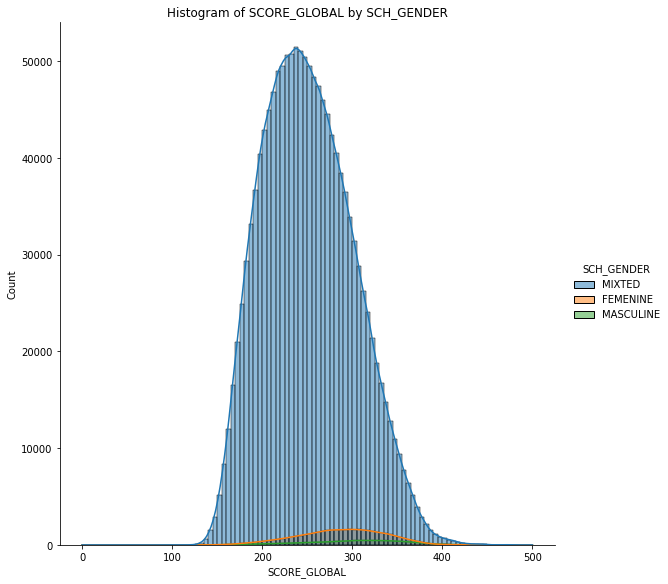

In [163]:
# Histogram of SCORE_GLOBAL by SCH_GENDER
Hist('SCORE_GLOBAL', 'SCH_GENDER')

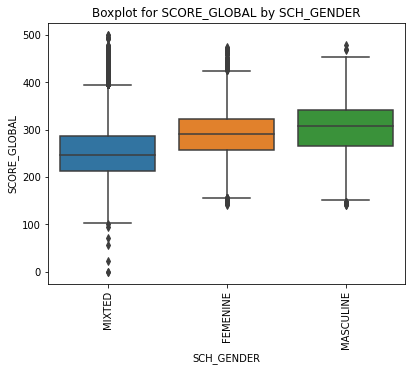

In [164]:
# Boxplot of SCORE_GLOBAL by SCH_GENDER
box('SCORE_GLOBAL', 'SCH_GENDER')

In [165]:
# Central statistics of SCORE_GLOBAL by SCH_GENDER
pd.options.display.max_rows = 100
sta('SCORE_GLOBAL', 'SCH_GENDER')

Central statistics of SCORE_GLOBAL by SCH_GENDER
           SCORE_GLOBAL                                                     \
                  count        mean        std    min    25%    50%    75%   
SCH_GENDER                                                                   
FEMENINE        40343.0  288.348239  47.565990  140.0  256.0  291.0  323.0   
MASCULINE       12494.0  301.230911  54.151417  140.0  265.0  307.0  341.0   
MIXTED        1398189.0  250.775452  50.241262    0.0  213.0  247.0  286.0   

                   
              max  
SCH_GENDER         
FEMENINE    475.0  
MASCULINE   479.0  
MIXTED      500.0  


There is a very wide difference between the results obtained by students in male and female schools, and even more so in mixed schools: a student in a mixed school obtains an average of 250.77 points, while in a male school he obtains 301 points, that is, a difference of more than 50 points. Something similar occurs with female students: a student in one of these schools scores 288 points, which means a difference of 38 points with her peers in a mixed school. 

These differences, although significant, should be validated with other types of studies, given that the proportion of students in male and female schools is only 3.6 percent of the total number of students. In addition to studying the consequences in other fields of development and not only in the results obtained from the 'Saber 11' test.

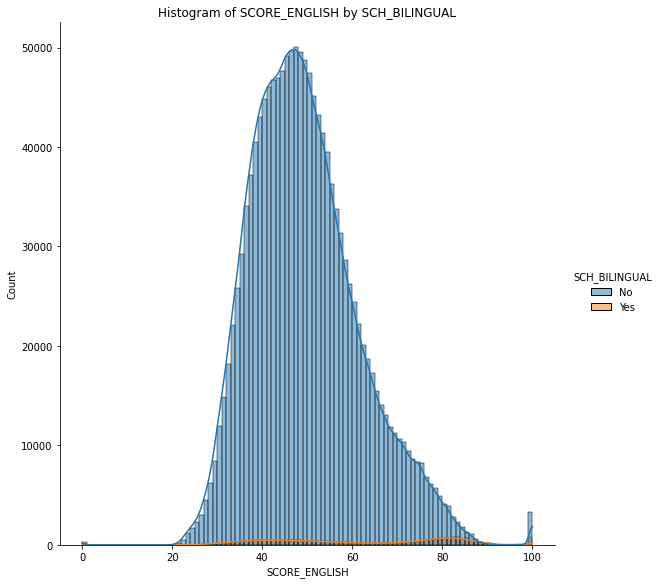

In [166]:
# Histogram of SCORE_ENGLISH by SCH_BILINGUAL
Hist('SCORE_ENGLISH', 'SCH_BILINGUAL')

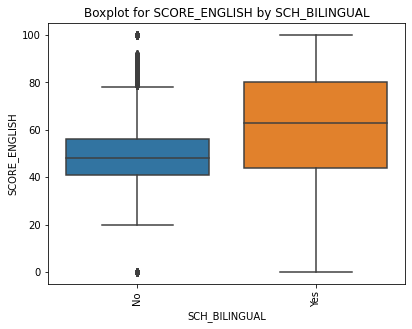

In [167]:
# Boxplot of SCORE_ENGLISH by SCH_BILINGUAL
box('SCORE_ENGLISH', 'SCH_BILINGUAL')

In [168]:
# Central statistics of SCORE_ENGLISH by SCH_BILINGUAL
pd.options.display.max_rows = 100
sta('SCORE_ENGLISH', 'SCH_BILINGUAL')

Central statistics of SCORE_ENGLISH by SCH_BILINGUAL
              SCORE_ENGLISH                                               \
                      count       mean        std  min   25%   50%   75%   
SCH_BILINGUAL                                                              
No                1426940.0  49.450315  12.080878  0.0  41.0  48.0  56.0   
Yes                 24086.0  62.454164  19.669616  0.0  44.0  63.0  80.0   

                      
                 max  
SCH_BILINGUAL         
No             100.0  
Yes            100.0  


In [169]:
# Central statistics of SCORE_GLOBAL by SCH_BILINGUAL
pd.options.display.max_rows = 100
sta('SCORE_GLOBAL', 'SCH_BILINGUAL')

Central statistics of SCORE_GLOBAL by SCH_BILINGUAL
              SCORE_GLOBAL                                                     \
                     count        mean        std    min    25%    50%    75%   
SCH_BILINGUAL                                                                   
No               1426940.0  251.682508  50.238495    0.0  213.0  248.0  287.0   
Yes                24086.0  286.143527  68.553367  126.0  227.0  291.0  345.0   

                      
                 max  
SCH_BILINGUAL         
No             500.0  
Yes            471.0  


As expected, the results of students in bilingual schools are better in English, this is reflected in the average score of 62.45 points for bilinguals and 49.45 points on average for non-bilinguals. These scores also end up affecting the overall score, but in addition to this, those who belong to bilingual schools obtain an average of 286 points while their peers obtain 251 points, that is, a difference of 35 points in the overall score. It is worth noting that the population of students in bilingual schools is very low. 

Given the technical difficulties, it is not included as a recommendation to implement bilingual schools throughout the country, but it seems that their impact would go beyond an improvement in English scores. It is worth noting that it is necessary to go deeper into the subject, since other variables may be affecting the scores of these students, such as socioeconomic status or the educational level of the parents. 

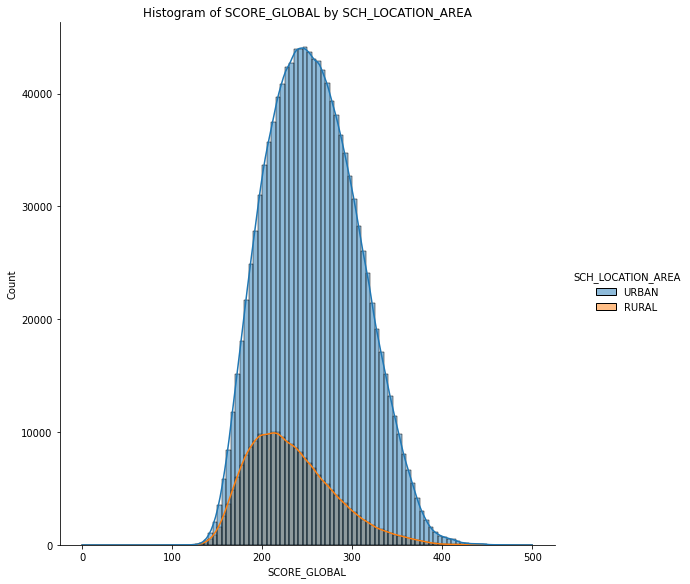

In [170]:
# Histogram of SCORE_GLOBAL by SCH_LOCATION_AREA
Hist('SCORE_GLOBAL', 'SCH_LOCATION_AREA')

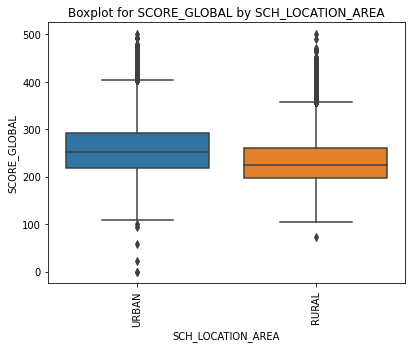

In [171]:
# Boxplot of SCORE_GLOBAL by SCH_LOCATION_AREA
box('SCORE_GLOBAL', 'SCH_LOCATION_AREA')

In [172]:
# Central statistics of SCORE_GLOBAL by SCH_LOCATION_AREA
pd.options.display.max_rows = 100
sta('SCORE_GLOBAL', 'SCH_LOCATION_AREA')

Central statistics of SCORE_GLOBAL by SCH_LOCATION_AREA
                  SCORE_GLOBAL                                             \
                         count        mean        std   min    25%    50%   
SCH_LOCATION_AREA                                                           
RURAL                 228420.0  232.269131  47.744553  72.0  197.0  225.0   
URBAN                1222606.0  255.988418  50.466454   0.0  218.0  253.0   

                                 
                     75%    max  
SCH_LOCATION_AREA                
RURAL              261.0  500.0  
URBAN              292.0  500.0  


We can see a difference in the results obtained between students who are from urban vs. rural schools, urban students have a better average performance, obtaining mean scores of 255.98 while rural students on average obtain 232.26. This means that there are differences in the population means of about 23 points in the overall score.
Therefore, students living in rural environments should receive support from educational institutions in order to improve learning and obtain better results in the 'Saber 11' tests.

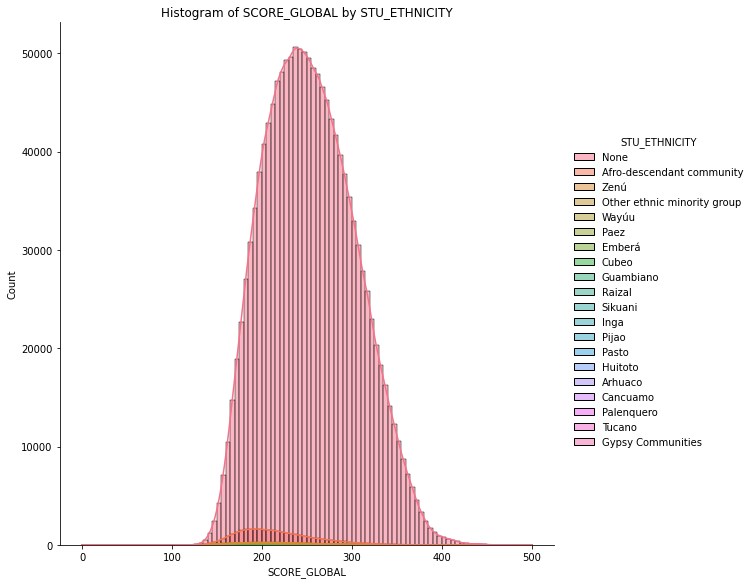

In [173]:
# Histogram of SCORE_GLOBAL by STU_ETHNICITY
Hist('SCORE_GLOBAL', 'STU_ETHNICITY')

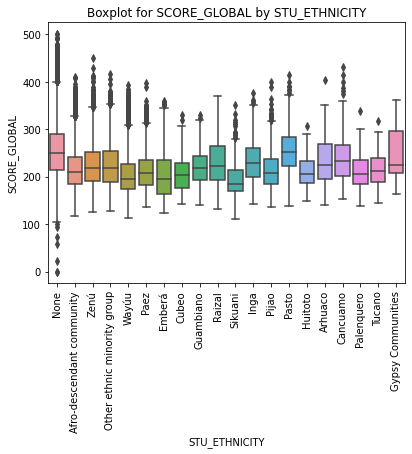

In [174]:
# Boxplot of SCORE_GLOBAL by STU_ETHNICITY
box('SCORE_GLOBAL', 'STU_ETHNICITY')

In [175]:
# Central statistics of SCORE_GLOBAL by STU_ETHNICITY
pd.options.display.max_rows = 100
sta('SCORE_GLOBAL', 'STU_ETHNICITY')

Central statistics of SCORE_GLOBAL by STU_ETHNICITY
                            SCORE_GLOBAL                                       \
                                   count        mean        std    min    25%   
STU_ETHNICITY                                                                   
Afro-descendant community        31880.0  216.433030  42.033130  118.0  185.0   
Arhuaco                            169.0  231.242604  47.434733  141.0  194.0   
Cancuamo                           267.0  238.434457  47.713257  152.0  202.0   
Cubeo                              174.0  206.666667  36.406557  142.0  177.0   
Emberá                            1763.0  202.595009  46.521149  123.0  164.0   
Guambiano                          336.0  219.729167  38.556117  140.0  192.0   
Gypsy Communities                   18.0  249.777778  61.065592  163.0  208.0   
Huitoto                            135.0  210.955556  33.062778  149.0  187.5   
Inga                               383.0  233.778068  41.

As we can see in the boxplot and in the table of statistics, there are marked differences in the scores obtained by the students according to their ethnicity, the tendency is that students with an ethnicity have lower scores than those who do not (None), especially the minority groups that present the lowest results, according to the average global score, are:

1. Sikuani, global score mean: 194.485095
2. Emberá, global score mean: 202.595009
3. Wayúu, global score mean: 204.531898
4. Cubeo, global score mean: 206.666667
5. Palenquero, global score mean: 210.626087

All minority groups, with the exception of the gypsy communities and natives of Pasto, have much lower scores than those without ethnicity (253.65 average points), so it is recommended to generate educational policies that focus on these groups, remembering that they represent about 6 percent of the total number of students. 

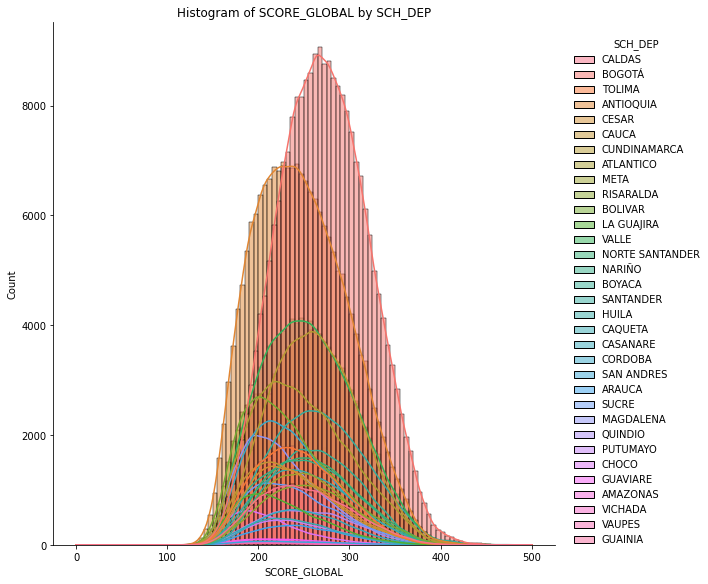

In [176]:
# Histogram of SCORE_GLOBAL by SCH_DEP
Hist('SCORE_GLOBAL', 'SCH_DEP')

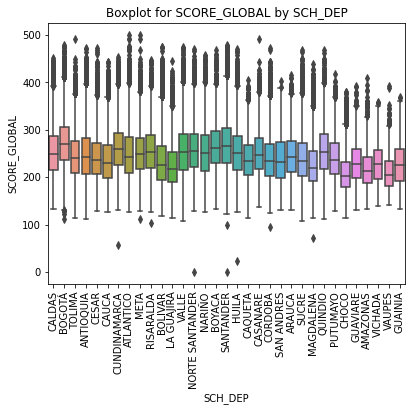

In [177]:
# Boxplot of SCORE_GLOBAL by SCH_DEP
box('SCORE_GLOBAL', 'SCH_DEP')

In [178]:
# Central statistics of SCORE_GLOBAL by SCH_DEP
pd.options.display.max_rows = 100
sta('SCORE_GLOBAL', 'SCH_DEP')

Central statistics of SCORE_GLOBAL by SCH_DEP
                SCORE_GLOBAL                                              \
                       count        mean        std    min    25%    50%   
SCH_DEP                                                                    
AMAZONAS              2029.0  219.208477  42.724179  132.0  187.0  212.0   
ANTIOQUIA           195724.0  246.943752  50.798168  112.0  207.0  243.0   
ARAUCA                8527.0  245.180016  45.363029  130.0  211.0  242.0   
ATLANTICO            81231.0  248.640901  52.253984  126.0  208.0  243.0   
BOGOTÁ              232843.0  271.634496  48.645579  112.0  236.0  270.0   
BOLIVAR              63751.0  233.353061  50.576912  118.0  195.0  225.0   
BOYACA               44418.0  263.909203  46.573494  132.0  230.0  262.0   
CALDAS               28430.0  251.716532  49.496196  133.0  215.0  248.0   
CAQUETA              11263.0  238.065080  44.451376  114.0  205.0  234.0   
CASANARE             15346.0  250.448195  

Looking at the results obtained by the department in which the school is located, we can see how the average performance of each of these was, in order to identify geographically the territories in which policies should be implemented in order to improve education and therefore the results obtained in the 'Saber 11' test.

The ten territories with the worst overall average results are listed below:

- CHOCO: 208.793992
- VAUPES: 211.288528
- AMAZONAS: 219.208477
- LA GUAJIRA: 225.301777
- MAGDALENA: 226.712194
- GUAINIA: 228.320217
- VICHADA: 228.509985
- GUAVIARE: 231.048853
- BOLIVAR: 233.353061
- CAUCA: 236.288295

In this group, departments such as Choco, Vaupés and Amazonas stand out for their low performance. 

These are far from the global average results of 252.25 points and from those obtained by the top ten departments: 

- BOGOTÁ: 271.634496
- SANTANDER: 267.065893
- BOYACA: 263.909203
- CUNDINAMARCA: 260.901961
- NORTE SANTANDER: 259.054171
- QUINDIO: 255.756395
- RISARALDA: 255.550558
- VALLE: 254.971947
- HUILA: 253.18529
- META: 251.997952

Therefore, students studying in the departments with the worst results should be the focus of policies to improve their education.

In [179]:
df_work.head()

,STU_GENDER,PERIOD,STU_HAS_ETHNICITY,STU_RESI_DEPART,FAMI_STRA_HOUSE,FAMI_EDU_FATHER,FAMI_EDU_MOTHER,FAMI_HAS_INTERNET,FAMI_HAS_COMPUTER,FAMI_EATS_MILK_AND_DERIVATES,FAMI_EATS_MEAT_FISH_EGG,FAMI_EATS_CEREAL_FRUITS_LEGUME,STU_WORK_HOURS_PER_WEEK,SCH_GENDER,SCH_NAT,SCH_CALENDAR,SCH_BILINGUAL,SCH_CHAR,SCH_LOCATION_AREA,SCH_JOURNEY,SCH_DEP,SCORE_CRITICAL_READING,SCORE_MATHEMATICS,SCORE_N_SCIENCES,SCORE_SOCIAL,SCORE_ENGLISH,SCORE_GLOBAL,STU_ETHNICITY
0,M,2020,No,CALDAS,Stratum 5,Secondary school (Bachillerato) completed,Secondary school (Bachillerato) completed,Yes,Yes,Every day or almost every day,Every day or almost every day,Every day or almost every day,0,MIXTED,NO OFFICIAL,A,No,ACADEMIC,URBAN,FULL,CALDAS,53,51,50,56,48.0,261,None
1,F,2020,No,BOGOTÁ,Stratum 3,Postgraduate,Complete professional education,Yes,Yes,3 to 5 times a week,Every day or almost every day,3 to 5 times a week,Between 11 and 20 hours,MIXTED,NO OFFICIAL,A,No,ACADEMIC,URBAN,FULL,BOGOTÁ,62,64,63,57,58.0,306,None
2,F,2020,No,BOGOTÁ,Stratum 1,Complete technical or technological,Incomplete technical or technological,Yes,No,3 to 5 times a week,Every day or almost every day,3 to 5 times a week,0,MIXTED,OFFICIAL,A,No,ACADEMIC,URBAN,UNIQUE,BOGOTÁ,65,66,63,67,51.0,321,None
3,M,2020,No,BOGOTÁ,Stratum 3,Postgraduate,Complete professional education,Yes,Yes,3 to 5 times a week,Every day or almost every day,1 or 2 times a week,0,MIXTED,NO OFFICIAL,A,No,ACADEMIC,URBAN,FULL,BOGOTÁ,64,65,75,67,67.0,338,None
4,M,2020,No,TOLIMA,Stratum 1,Completed elementary school,Incomplete high school (Bachillerato),Yes,No,1 or 2 times a week,1 or 2 times a week,1 or 2 times a week,Between 11 and 20 hours,MIXTED,OFFICIAL,A,No,ACADEMIC,URBAN,MORNING,TOLIMA,56,44,45,40,29.0,225,None
